# IND5003 Enron Project
## Contents of this Jupyter Notebook
### Dataset
Dataset from Prof: 
(https://www.cs.cmu.edu/~./enron/)
- Unstructured Dataset containing raw text in the form of emails
**Make sure that the dataset 'maildir' is in the same directory as your project on your own system. Else this would not work**

## Approach to this Project

### Research Questions
(Use research questions to provide a narrative and storyline in our analysis of the Enron Email Corpus)

We would be taking a broad to narrow approach in terms of the narrative that we are looking to create. 

Some research questions that we would be hoping to analyse in this project are:
1. Are there any topical shifts that we can identify prior, leading up to and after the fraud has been exposed?
2. Can we detect sentiment shifts and anomalies in communication patterns leading up to, during and after the exposure of the fraud?
3. Identification of key individuals involved in the key discussions and anomalies in their comms patterns

#### Timeline

We have an intention to split our analysis into 3 defined timeframes:
1. Pre-Crisis (June 1999 - Aug 2001)
2. During Crisis ( Sep 2000 - Oct 2001 )
3. Post Crisis ( Nov 2001 - June 2002)

*** [GUYS WE NEED TO THINK OF THE DATES TO SPLIT THE TIMEFRAMES INTO. I WAS THINKING WE CAN FOLLOW JUST THE TIMELINE. THIS PART DEFINITELY HAVE TO STATE ASSUMPTIONS] ***

These research questions would be answered using a variety of NLP and Unsupervised Learning Techniques. 

*** [GUYS WE NEED TO THINK OF THE TECHNIQUES] ***
1. t-sne for initial identification of clusters
2. LDA for topic identification
3. Named entity recognition for trends in any entity
4. Sentimental Analysis
5. Anomaly detection (HOW?) 
6. Information retrieval to identify relevant individuals

### Overall Steps to Tackle this Project
1. Data Extraction
2. Data Cleaning & Preprocessing
3. Initial Data Exploration
    - Sender Frequency Analysis
    - Number of Emails Across Time
    - General topic modeling
    - General sentiment analysis
    - Word Cloud & Bar Charts for the Top Senders (20%)
    - Network Graph
    - t-sne graph
4. Research Questions
    1. Temporal Topical shifts using LDA Topic Modeling
    2. Temporal Sentimental Analysis - Segment the emails by quarters. Look at the way communication changes over time.
    3. Anomaly detection using?
    4. Key individual detection using?

    

## Section 1: Data Extraction
- Extract the emails from the unstructured raw folder


In [2]:
# Import the relevant libraries required for Section 1
import os # Required for directory traversal
import pandas as pd
import email
from email import policy
from email.parser import BytesParser
from collections import defaultdict
from itertools import islice

# additional libraries added for possible usage
import numpy as np
import pprint
import pandas as pd
import gensim
from gensim.parsing.preprocessing import *
import gensim.downloader as api
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import manifold

from transformers import pipeline

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import plotly.express as px
from itertools import islice
import ipywidgets as widgets

In [57]:
# # Set the maildir path to the respective paths in your system 
# # ! Note that maildir should be in the same directory as your project on your own system, would change if you are using windows
# maildir_path = '/Users/Dylan/Documents/IND5003/Projects/maildir'

In [58]:
# # Create a list of all the directories in the maildir for sanity check
# maildir_list = os.listdir(maildir_path)
# print(maildir_list)

In [59]:
# def parse_email(file_path):
#     try:
#         with open(file_path, 'rb') as f:
#             msg = BytesParser(policy=policy.default).parse(f)
        
#         # Extract fields from the email
#         email_from = msg['From']
#         email_to = msg['To']
#         email_date = msg['Date']
#         email_subject = msg['Subject']
#         email_body = msg.get_body(preferencelist=('plain')).get_content() if msg.get_body(preferencelist=('plain')) else ''
        
#         return [email_from, email_to, email_date, email_subject, email_body]
#     except Exception as e:
#         print(f"Error parsing file {file_path}: {e}")
#         return None

# def batch_iterator(iterator, batch_size):
#     """Yield batches of specified size from an iterator."""
#     while True:
#         batch = list(islice(iterator, batch_size))
#         if not batch:
#             break
#         yield batch

# def load_emails(maildir_path, batch_size=10, max_emails=50):
#     email_data = []
#     file_paths = []

#     # Walk through the directory to collect file paths
#     for root, dirs, files in os.walk(maildir_path):
#         for file in files:
#             if file == '.DS_Store' or file.startswith('.'):
#                 continue  # Skip system files and hidden files
#             file_paths.append(os.path.join(root, file))
#             if len(file_paths) >= max_emails:
#                 break
#         if len(file_paths) >= max_emails:
#             break

#     # Process emails in batches
#     for batch in batch_iterator(iter(file_paths), batch_size):
#         batch_data = []
#         for file_path in batch:
#             result = parse_email(file_path)
#             if result is not None:
#                 batch_data.append(result)
        
#         # Append batch data to the main list
#         email_data.extend(batch_data)

#     # Create a DataFrame from the extracted data
#     df = pd.DataFrame(email_data, columns=['From', 'To', 'Date', 'Subject', 'Body'])
#     return df

# # Load and parse emails
# emails_df = load_emails(maildir_path, batch_size=10, max_emails=50)

# # Display the DataFrame
# print(emails_df.head())

In [60]:

# # ! This is a very large dataset and will take a long time to run
# # ! DO NOT RUN THIS FOR FUN UNLESS YOU WANT YOUR COMPUTER TO CRASH
# def parse_email(file_path):
#     try:
#         with open(file_path, 'rb') as f:
#             msg = BytesParser(policy=policy.default).parse(f)
        
#         # Extract fields from the email
#         email_from = msg['From']
#         email_to = msg['To']
#         email_date = msg['Date']
#         email_subject = msg['Subject']
#         email_body = msg.get_body(preferencelist=('plain')).get_content() if msg.get_body(preferencelist=('plain')) else ''
        
#         return [email_from, email_to, email_date, email_subject, email_body]
#     except Exception as e:
#         print(f"Error parsing file {file_path}: {e}")
#         return None

# def batch_iterator(iterator, batch_size):
#     """Yield batches of specified size from an iterator."""
#     while True:
#         batch = list(islice(iterator, batch_size))
#         if not batch:
#             break
#         yield batch

# def load_emails(maildir_path, batch_size=1000):
#     email_data = []
#     file_paths = []

#     # Walk through the directory to collect file paths
#     for root, dirs, files in os.walk(maildir_path):
#         for file in files:
#             if file == '.DS_Store' or file.startswith('.'):
#                 continue  # Skip system files and hidden files
#             file_paths.append(os.path.join(root, file))

#     # Process emails in batches
#     for batch in batch_iterator(iter(file_paths), batch_size):
#         batch_data = []
#         for file_path in batch:
#             result = parse_email(file_path)
#             if result is not None:
#                 batch_data.append(result)
        
#         # Append batch data to the main list
#         email_data.extend(batch_data)

#     # Create a DataFrame from the extracted data
#     df = pd.DataFrame(email_data, columns=['From', 'To', 'Date', 'Subject', 'Body'])
#     return df

# # Load and parse emails
# emails_df = load_emails(maildir_path, batch_size=1000)

# # Display the DataFrame
# print(emails_df.head())

### Loading the Data into a Pandas DF

In [61]:
# Convert emails_df to a CSV file
# Save the DataFrame as a CSV file in the specified directory

#emails_df.to_csv('/Users/Dylan/Documents/IND5003/Projects/emails_uncleaned.csv', index=False)


In [3]:
# Load the CSV file back into a DataFrame

# PLEASE CHANGE IT TO YOUR OWN DIRECTORY IN YOUR OWN SYSTEM 

# Load the CSV file back into a DataFrame

# PLEASE CHANGE IT TO YOUR OWN DIRECTORY IN YOUR OWN SYSTEM 

enron_uncleaned_emails = pd.read_csv('D:/IND5003/enron_emails_uncleaned/enron_emails_uncleaned.csv')
#enron_uncleaned_emails = pd.read_csv('D:/emails.csv')

In [4]:
enron_uncleaned_emails.head()

,From,To,Date,Subject,Body
0,msagel@home.com,jarnold@enron.com,"Thu, 16 Nov 2000 09:30:00 -0800",Status,John:\n?\nI'm not really sure what happened be...
1,slafontaine@globalp.com,john.arnold@enron.com,"Fri, 08 Dec 2000 05:05:00 -0800",re:summer inverses,i suck-hope youve made more money in natgas la...
2,iceoperations@intcx.com,"icehelpdesk@intcx.com, internalmarketing@intcx...","Tue, 15 May 2001 09:43:00 -0700",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece..."
3,jeff.youngflesh@enron.com,"anthony.gilmore@enron.com, colleen.koenig@enro...","Mon, 27 Nov 2000 01:49:00 -0800",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...
4,caroline.abramo@enron.com,mike.grigsby@enron.com,"Tue, 12 Dec 2000 09:33:00 -0800",Harvard Mgmt,Mike- I have their trader coming into the offi...


In [5]:
# # Find "kitchen" in the column "From"

# # This is to determine that there are still emails sent from louise kitchen despite the original parsing error due to the encoding of the email
kitchen_emails = enron_uncleaned_emails[enron_uncleaned_emails['From'].str.contains('kitchen', case=False, na=False)]
print(kitchen_emails)

                            From  \
617     louise.kitchen@enron.com   
874     louise.kitchen@enron.com   
910     louise.kitchen@enron.com   
926     louise.kitchen@enron.com   
5072    louise.kitchen@enron.com   
...                          ...   
503415  louise.kitchen@enron.com   
503507  louise.kitchen@enron.com   
509732  louise.kitchen@enron.com   
509790  louise.kitchen@enron.com   
509829  louise.kitchen@enron.com   

                                                       To  \
617                                 john.arnold@enron.com   
874     tim.belden@enron.com, f..calger@enron.com, m.....   
910     wes.colwell@enron.com, georgeanne.hodges@enron...   
926                                    c..bland@enron.com   
5072                              john.lavorato@enron.com   
...                                                   ...   
503415  rob.milnthorp@enron.com, f..calger@enron.com, ...   
503507  rob.milnthorp@enron.com, f..calger@enron.com, ...   
509732  k..allen@e

## Section 2: Data Preprocessing
### Start with the Cleaning
* Check for any nulls
* Drop the missing values
* Remove the duplicates
* Format the dates 



In [6]:
# Check for Nulls in Each Column
missing_values = enron_uncleaned_emails.isnull().sum()
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
print(missing_values_df)

    Column  Missing Values
0     From               0
1       To           21847
2     Date               0
3  Subject           19187
4     Body               0


In [7]:
# Description of the DataFrame
enron_uncleaned_emails.describe()

,From,To,Date,Subject,Body
count,517396,495549,517396,498209,517396
unique,20326,58556,224119,159286,249020
top,kay.mann@enron.com,pete.davis@enron.com,"Wed, 27 Jun 2001 16:02:00 -0700",RE:,"As you know, Enron Net Works (ENW) and Enron G..."
freq,16735,9155,1118,6477,112


In [8]:
enron_uncleaned_emails.head()

,From,To,Date,Subject,Body
0,msagel@home.com,jarnold@enron.com,"Thu, 16 Nov 2000 09:30:00 -0800",Status,John:\n?\nI'm not really sure what happened be...
1,slafontaine@globalp.com,john.arnold@enron.com,"Fri, 08 Dec 2000 05:05:00 -0800",re:summer inverses,i suck-hope youve made more money in natgas la...
2,iceoperations@intcx.com,"icehelpdesk@intcx.com, internalmarketing@intcx...","Tue, 15 May 2001 09:43:00 -0700",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece..."
3,jeff.youngflesh@enron.com,"anthony.gilmore@enron.com, colleen.koenig@enro...","Mon, 27 Nov 2000 01:49:00 -0800",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...
4,caroline.abramo@enron.com,mike.grigsby@enron.com,"Tue, 12 Dec 2000 09:33:00 -0800",Harvard Mgmt,Mike- I have their trader coming into the offi...


In [11]:
# Fill out the missing values with empty strings
enron_cleaned_emails = enron_uncleaned_emails.fillna('')

In [9]:
enron_cleaned_emails_null_To = enron_uncleaned_emails[enron_uncleaned_emails.To.isna()]

In [10]:
enron_cleaned_emails_null_To.head()
enron_cleaned_emails_null_To.tail()

,From,To,Date,Subject,Body
517036,outlook-migration-team@enron.com,NaN,"Fri, 04 May 2001 01:32:21 -0700",Don't forget to register!,To register your Palm Computing\n organizer el...
517037,diana.scholtes@enron.com,NaN,"Tue, 14 Aug 2001 13:43:50 -0700",ISAS Survey,"\n------------\nFrom:\tHackney, Mark W(Z39911)..."
517038,diana.scholtes@enron.com,NaN,"Thu, 15 Nov 2001 14:56:47 -0800",tsin,"\n------------\nFrom:\tWill, Lloyd\nSent:\tTue..."
517039,diana.scholtes@enron.com,NaN,"Mon, 24 Sep 2001 13:22:33 -0700",July 2001,\n------------\nFrom:\tWYNDI Workman-Rodriguez...
517101,40enron@enron.com,NaN,"Wed, 10 Oct 2001 23:56:20 -0700",Workstation Upgrade,\nWhat:\tWorkstation upgrade for security enha...


In [12]:
# Post cleaning Check
missing_values_check = enron_cleaned_emails.isnull().sum()
missing_values_df_check = pd.DataFrame({'Column': missing_values_check.index, 'Missing Values': missing_values_check.values})
print(missing_values_df_check)

    Column  Missing Values
0     From               0
1       To               0
2     Date               0
3  Subject               0
4     Body               0


In [13]:
# Describe the cleaned DataFrame
enron_cleaned_emails.describe()

,From,To,Date,Subject,Body
count,517396,517396,517396,517396,517396
unique,20326,58557,224119,159287,249020
top,kay.mann@enron.com,,"Wed, 27 Jun 2001 16:02:00 -0700",,"As you know, Enron Net Works (ENW) and Enron G..."
freq,16735,21847,1118,19187,112


* From running the code above, the output would show that there are 249020 emails with unique bodies out of the 517396 emails. 
    * This means that ~51.9% of emails in the uncleaned dataframe are not unique
    * This would ensure that the subsequent analytical metrics (when performing LDA, TFIDF, Word2vec) are not inflated. 

In [14]:
# Remove duplicate emails based on the 'Body' column, keeping only the first occurrence
enron_cleaned_emails_body_unique = enron_cleaned_emails.drop_duplicates(subset=['Body', 'From', 'To', 'Date', 'Subject'], keep='first')
# Describe the DataFrame after removing duplicates
enron_cleaned_emails_body_unique.describe()

,From,To,Date,Subject,Body
count,255488,255488,255488,255488,255488
unique,20326,58557,224119,159287,249020
top,jeff.dasovich@enron.com,,"Wed, 27 Jun 2001 16:02:00 -0700",,test
freq,5530,9989,1118,8766,40


In [71]:
# # When running the code block above, i observed that jeff dasovich sent the most emails. 
# # Now i want to explore the number of emails he sent
# # Filter emails where 'From' is 'jeff.dasovich@enron.com'
# jeff_emails = enron_cleaned_emails_body_unique[enron_cleaned_emails_body_unique['From'] == 'jeff.dasovich@enron.com']

# # Count the number of emails he sent
# jeff_emails_count = jeff_emails.shape[0]

# # Display the count
# print(f"Jeff Dasovich sent {jeff_emails_count} emails.")

# # Display the first few rows of Jeff's emails
# jeff_emails.head()


In [15]:
# Convert the Date column to a pandas datetime object in the deduplicated dataframe
enron_cleaned_emails_body_unique['Date'] = pd.to_datetime(enron_cleaned_emails_body_unique['Date'], errors='coerce',utc=True)
# Print the types of each column to ensure that the Date column is now a datetime object
print(enron_cleaned_emails_body_unique.dtypes)

From                    object
To                      object
Date       datetime64[ns, UTC]
Subject                 object
Body                    object
dtype: object


C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\2346931599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Date'] = pd.to_datetime(enron_cleaned_emails_body_unique['Date'], errors='coerce',utc=True)


In [16]:
# Convert the Date column to a pandas datetime object in the deduplicated dataframe
#enron_cleaned_emails_body_unique['Date'] = pd.to_datetime(enron_cleaned_emails_body_unique['Date'], errors='coerce', utc=False)

# Print the types of each column to ensure that the Date column is now a datetime object
#print(enron_cleaned_emails_body_unique.dtypes)

# Extract the 'Year' from the 'Date' column
enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Date'].dt.year

# Convert the 'Year' column to an integer type if necessary
enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Year'].astype('Int64')

# Count the number of emails sent per year and sort the index (years)
emails_per_year = enron_cleaned_emails_body_unique['Year'].value_counts().sort_index()

# Create a DataFrame to hold the year and the number of emails
emails_per_year_df = pd.DataFrame({'Year': emails_per_year.index, 'Emails': emails_per_year.values})

# Print the resulting DataFrame
print(emails_per_year_df)

    Year  Emails
0   1980     292
1   1986       2
2   1997     112
3   1998      90
4   1999    4909
5   2000   65982
6   2001  154653
7   2002   29371
8   2004      66
9   2005       1
10  2007       1
11  2012       2
12  2020       2
13  2024       1
14  2043       1
15  2044       3


C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\2569608986.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Date'].dt.year
C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\2569608986.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Year'].astype('Int64')


In [17]:
# Create another column with the months of each row using the deduplicated dataframe
enron_cleaned_emails_body_unique['Month'] = enron_cleaned_emails_body_unique['Date'].dt.month.astype('Int64')

# Group the dataframe by Year and Month and count the number of emails (using 'From' as the count reference)
emails_per_month_year = enron_cleaned_emails_body_unique.groupby(['Year', 'Month']).count()['From']

# Print the resulting grouped data
print(emails_per_month_year)


Year  Month
1980  1        292
1986  4          1
      5          1
1997  1          1
      3         10
              ... 
2012  11         2
2020  12         2
2024  5          1
2043  12         1
2044  1          3
Name: From, Length: 73, dtype: int64


C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\703201955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Month'] = enron_cleaned_emails_body_unique['Date'].dt.month.astype('Int64')


In [18]:
# Check the number of emails in 2002 divided by month
emails_per_month_year[2002]

Month
1     17154
2      6756
3      2930
4       954
5       748
6       745
7        76
9         6
10        1
12        1
Name: From, dtype: int64

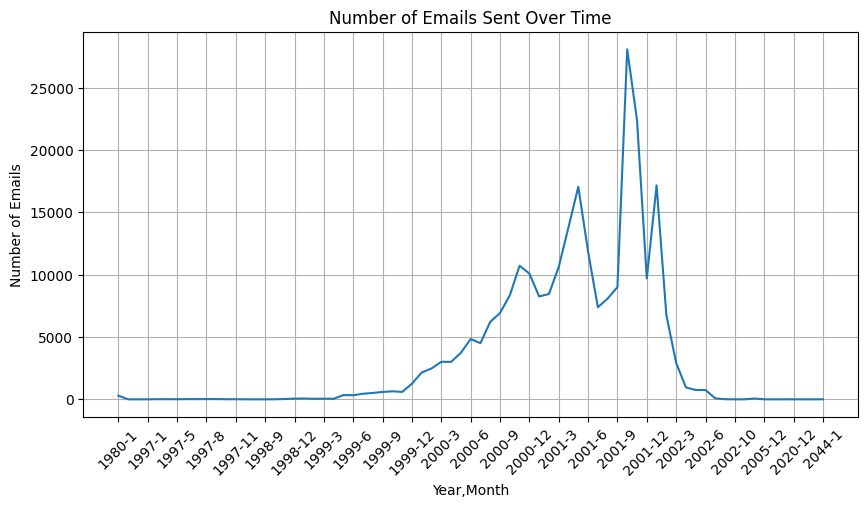

In [19]:
# Create large plot size
plt.figure(figsize=(10, 5))
emails_per_month_year.plot()
# Add tick marks in the x axis for every 3 months
plt.xticks(np.arange(0, len(emails_per_month_year), step=3), rotation=45,
           labels=[f"{year}-{month}" for year, month in emails_per_month_year.index][::3])
plt.ylabel('Number of Emails')
plt.title('Number of Emails Sent Over Time')
plt.grid()
plt.show()

## Debug Duplicates section
(Can ignore)

If anybody is interested, there was an initial screw up in dropping the duplicates of those emails that had the same Body
    - Initially i only removed the duplicated emails based on the body column
        - That means that if 2 or more emails had the exact same content even if they were sent by diff people, they were considered duplicates and only one was kept
    - But if you look at July 2001, there were many emails with same body content, but different senders, recipients and dates


    Year  Emails
0   1980     522
1   1986       2
2   1997     437
3   1998     177
4   1999   11144
5   2000  196100
6   2001  272964
7   2002   35969
8   2004      70
9   2005       1
10  2007       1
11  2012       2
12  2020       2
13  2024       1
14  2043       1
15  2044       3


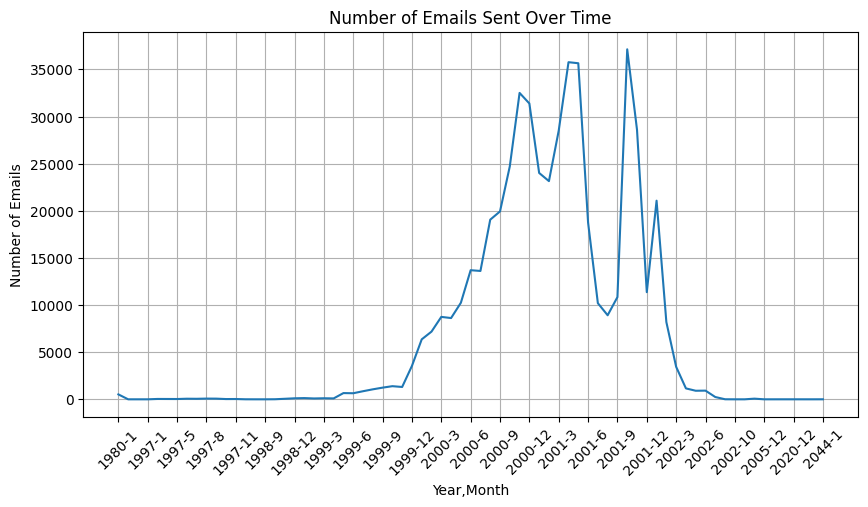

In [91]:
# # ! ORGINAL CODE - DO NOT DELETE
# # Convert the Date column to a pandas datetime object
# enron_cleaned_emails['Date'] = pd.to_datetime(enron_cleaned_emails['Date'], errors='coerce', utc='False')

# # Print the types of each column to ensure that the Date column is now a datetime object
# enron_cleaned_emails.dtypes

# # Create a table with the number of emails sent every year
# enron_cleaned_emails['Year'] = enron_cleaned_emails['Date'].dt.year
# emails_per_year = enron_cleaned_emails['Year'].value_counts().sort_index()
# emails_per_year_df = pd.DataFrame({'Year': emails_per_year.index, 'Emails': emails_per_year.values})
# print(emails_per_year_df)

# enron_cleaned_emails['Month'] = enron_cleaned_emails['Date'].dt.month
# # group the dataframe by Year and Month and cont the number of items in each index
# emails_per_month_year = enron_cleaned_emails.groupby(['Year','Month']).count()['From']

# # Create large plot size
# plt.figure(figsize=(10, 5))
# emails_per_month_year.plot()
# # Add tick marks in the x axis for every 3 months
# plt.xticks(np.arange(0, len(emails_per_month_year), step=3), rotation=45,
#            labels=[f"{year}-{month}" for year, month in emails_per_month_year.index][::3])
# plt.ylabel('Number of Emails')
# plt.title('Number of Emails Sent Over Time')
# plt.grid()
# plt.show()

In [90]:
# # sanity check - to inspect why the number of emails in July 2001 is 1 after deduplicating
# # Filter the original dataframe for emails sent in July 2001
# july_2001_emails_original = enron_cleaned_emails[(enron_cleaned_emails['Date'] >= '2001-07-01') & 
#                                                  (enron_cleaned_emails['Date'] <= '2001-07-31')]

# # Filter the deduplicated dataframe for emails sent in July 2001
# july_2001_emails_deduplicated = enron_cleaned_emails_body_unique[(enron_cleaned_emails_body_unique['Date'] >= '2001-07-01') & 
#                                                                  (enron_cleaned_emails_body_unique['Date'] <= '2001-07-31')]

# # Compare the number of emails before and after deduplication
# print(f"Number of emails in July 2001 (Original): {july_2001_emails_original.shape[0]}")
# print(f"Number of emails in July 2001 (Deduplicated): {july_2001_emails_deduplicated.shape[0]}")


Number of emails in July 2001 (Original): 9726
Number of emails in July 2001 (Deduplicated): 1


In [95]:
# # Check if there are emails in July 2001 that were removed due to duplicate 'Body' values
# duplicates_july_2001 = july_2001_emails_original[july_2001_emails_original.duplicated(subset=['Body'], keep=False)]

# # Display the first few rows of duplicates
# duplicates_july_2001.head()
# duplicates_july_2001.shape


(4627, 7)

In [96]:
# # Remove duplicates considering 'Body', 'From', 'To', 'Date', and 'Subject'
# enron_cleaned_emails_body_unique_refined = enron_cleaned_emails.drop_duplicates(subset=['Body', 'From', 'To', 'Date', 'Subject'], keep='first')

# # Describe the new DataFrame after refined deduplication
# enron_cleaned_emails_body_unique_refined.describe()

# # Display a few rows to verify the result
# enron_cleaned_emails_body_unique_refined.head()


,From,To,Date,Subject,Body,Year,Month
0,msagel@home.com,jarnold@enron.com,2000-11-16 17:30:00+00:00,Status,John:\n?\nI'm not really sure what happened be...,2000,11
1,slafontaine@globalp.com,john.arnold@enron.com,2000-12-08 13:05:00+00:00,re:summer inverses,i suck-hope youve made more money in natgas la...,2000,12
2,iceoperations@intcx.com,"icehelpdesk@intcx.com, internalmarketing@intcx...",2001-05-15 16:43:00+00:00,The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece...",2001,5
3,jeff.youngflesh@enron.com,"anthony.gilmore@enron.com, colleen.koenig@enro...",2000-11-27 09:49:00+00:00,Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,2000,11
4,caroline.abramo@enron.com,mike.grigsby@enron.com,2000-12-12 17:33:00+00:00,Harvard Mgmt,Mike- I have their trader coming into the offi...,2000,12


/var/folders/mg/37xvz49s5ybb842_sy2sm9500000gp/T/ipykernel_37347/711209652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique_refined['Month'] = enron_cleaned_emails_body_unique_refined['Date'].dt.month


<Axes: title={'center': 'Number of Emails Sent Over Time (Refined)'}, xlabel='Year,Month', ylabel='Number of Emails'>

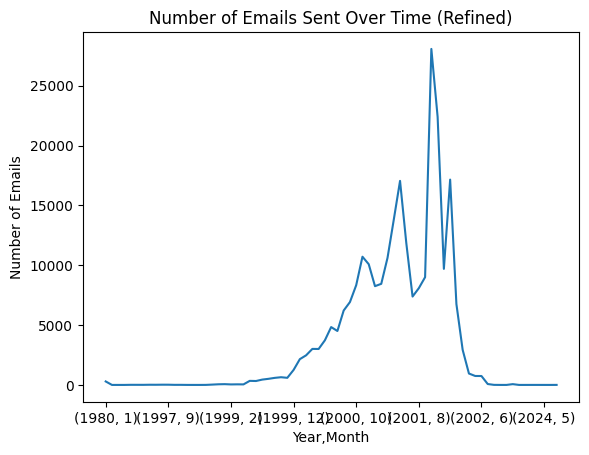

In [97]:
# # Create another column with the months of each row in the refined deduplicated dataframe
# enron_cleaned_emails_body_unique_refined['Month'] = enron_cleaned_emails_body_unique_refined['Date'].dt.month

# # Group the refined dataframe by Year and Month and count the number of emails
# emails_per_month_year_refined = enron_cleaned_emails_body_unique_refined.groupby(['Year', 'Month']).count()['From']

# # Plot the number of emails sent over time using the refined deduplicated dataframe
# emails_per_month_year_refined.plot(kind='line', title='Number of Emails Sent Over Time (Refined)', ylabel='Number of Emails', xlabel='Year,Month')


We can see that emails start jumping up around December 1999, inreasing to its' peak at around Oct 2001 with notable decrease around August 2001. Afterwards the number of emails in the data set decreases until around June 2002. 

## Splitting into Different Time Frames

In [85]:
# Divide the deduplicated enron_cleaned_emails_body_unique into 3 dataframes

# The first dataframe for dates between June 1999 and August 2000 (Pre-crisis)
enron_pre_crisis = enron_cleaned_emails_body_unique[(enron_cleaned_emails_body_unique['Date'] >= '1999-06-01') & 
                                                    (enron_cleaned_emails_body_unique['Date'] <= '2000-08-31')]

# The second dataframe for dates between Sep 2000 to Oct 2001 (During crisis)
enron_during_crisis = enron_cleaned_emails_body_unique[(enron_cleaned_emails_body_unique['Date'] >= '2000-09-01') & 
                                                       (enron_cleaned_emails_body_unique['Date'] <= '2001-10-31')]

# The third dataframe for dates between November 2001 to June 2002 (Post-crisis)
enron_post_crisis = enron_cleaned_emails_body_unique[(enron_cleaned_emails_body_unique['Date'] >= '2001-11-01') & 
                                                     (enron_cleaned_emails_body_unique['Date'] <= '2002-06-30')]


# Section 3: Exploratory Data Analysis
### Continue EDA Here @ Agnesh

Analyzing Top Sender Frequencies

#Given that there are multiple recipients i want to create separate rows for each sender-recipient pair so that subsequent counts can factor the weights accordingly

In [20]:
enron_EDA_uncleaned_set = enron_uncleaned_emails.copy()
def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if pd.isna(line):
        return line
        
    else:
        addrs = str(line).split(',')
        addrs = list(set(map(lambda x: x.strip(), addrs)))
        
        return addrs
enron_EDA_uncleaned_set['To'] = enron_EDA_uncleaned_set['To'].map(split_email_addresses)

In [21]:
enron_EDA_uncleaned_set.head()

,From,To,Date,Subject,Body
0,msagel@home.com,[jarnold@enron.com],"Thu, 16 Nov 2000 09:30:00 -0800",Status,John:\n?\nI'm not really sure what happened be...
1,slafontaine@globalp.com,[john.arnold@enron.com],"Fri, 08 Dec 2000 05:05:00 -0800",re:summer inverses,i suck-hope youve made more money in natgas la...
2,iceoperations@intcx.com,"[icehelpdesk@intcx.com, internalmarketing@intc...","Tue, 15 May 2001 09:43:00 -0700",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece..."
3,jeff.youngflesh@enron.com,"[anthony.gilmore@enron.com, sarah-joy.hunter@e...","Mon, 27 Nov 2000 01:49:00 -0800",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...
4,caroline.abramo@enron.com,[mike.grigsby@enron.com],"Tue, 12 Dec 2000 09:33:00 -0800",Harvard Mgmt,Mike- I have their trader coming into the offi...


#Explode splits the list of recipients into new rows in the dataframe

In [22]:
enron_EDA_uncleaned_expand = enron_EDA_uncleaned_set.explode("To")

In [23]:
enron_EDA_uncleaned_expand.head()

,From,To,Date,Subject,Body
0,msagel@home.com,jarnold@enron.com,"Thu, 16 Nov 2000 09:30:00 -0800",Status,John:\n?\nI'm not really sure what happened be...
1,slafontaine@globalp.com,john.arnold@enron.com,"Fri, 08 Dec 2000 05:05:00 -0800",re:summer inverses,i suck-hope youve made more money in natgas la...
2,iceoperations@intcx.com,icehelpdesk@intcx.com,"Tue, 15 May 2001 09:43:00 -0700",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece..."
2,iceoperations@intcx.com,internalmarketing@intcx.com,"Tue, 15 May 2001 09:43:00 -0700",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece..."
3,jeff.youngflesh@enron.com,anthony.gilmore@enron.com,"Mon, 27 Nov 2000 01:49:00 -0800",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...


#Recipient not of concern, if there are multiple recipients for the same Body in the scope of analyzing the sender frequencies --> so we can drop duplicates without considering the To column

In [24]:
enron_EDA_cleaned = enron_EDA_uncleaned_set.fillna('')
enron_EDA_unique = enron_EDA_cleaned.drop_duplicates(subset=['Body', 'From', 'Date', 'Subject'], keep='first') 

Leveraging Kevin's code but setting utc=True

In [25]:
enron_EDA_unique['Date'] = pd.to_datetime(enron_EDA_unique['Date'], errors='coerce',utc=True)
# Extract the 'Year' from the 'Date' column
enron_EDA_unique['Year'] = enron_EDA_unique['Date'].dt.year

# Convert the 'Year' column to an integer type if necessary
enron_EDA_unique['Year'] = enron_EDA_unique['Year'].astype('Int64')
enron_EDA_unique['Month'] = enron_EDA_unique['Date'].dt.month.astype('Int64')

# Group the dataframe by Year and Month and count the number of emails (using 'From' as the count reference)

C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\1744418591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_EDA_unique['Date'] = pd.to_datetime(enron_EDA_unique['Date'], errors='coerce',utc=True)
C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\1744418591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_EDA_unique['Year'] = enron_EDA_unique['Date'].dt.year
C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\1744418591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [26]:
enron_EDA_unique.head()

,From,To,Date,Subject,Body,Year,Month
0,msagel@home.com,[jarnold@enron.com],2000-11-16 17:30:00+00:00,Status,John:\n?\nI'm not really sure what happened be...,2000,11
1,slafontaine@globalp.com,[john.arnold@enron.com],2000-12-08 13:05:00+00:00,re:summer inverses,i suck-hope youve made more money in natgas la...,2000,12
2,iceoperations@intcx.com,"[icehelpdesk@intcx.com, internalmarketing@intc...",2001-05-15 16:43:00+00:00,The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece...",2001,5
3,jeff.youngflesh@enron.com,"[anthony.gilmore@enron.com, sarah-joy.hunter@e...",2000-11-27 09:49:00+00:00,Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,2000,11
4,caroline.abramo@enron.com,[mike.grigsby@enron.com],2000-12-12 17:33:00+00:00,Harvard Mgmt,Mike- I have their trader coming into the offi...,2000,12


Getting top 20 percent of senders

In [27]:
overall_sender_counts = enron_EDA_unique['From'].value_counts()
threshold = np.percentile(overall_sender_counts, 80)
top_20_percent_senders = overall_sender_counts[overall_sender_counts >= threshold].index
top_senders_df = enron_EDA_unique[enron_EDA_unique['From'].isin(top_20_percent_senders)]

In [28]:
top_senders_df.head()

,From,To,Date,Subject,Body,Year,Month
0,msagel@home.com,[jarnold@enron.com],2000-11-16 17:30:00+00:00,Status,John:\n?\nI'm not really sure what happened be...,2000,11
3,jeff.youngflesh@enron.com,"[anthony.gilmore@enron.com, sarah-joy.hunter@e...",2000-11-27 09:49:00+00:00,Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,2000,11
4,caroline.abramo@enron.com,[mike.grigsby@enron.com],2000-12-12 17:33:00+00:00,Harvard Mgmt,Mike- I have their trader coming into the offi...,2000,12
5,klarnold@flash.net,[john.arnold@enron.com],2000-12-12 07:52:00+00:00,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,>Sender: articles-email@ms1.lga2.nytimes.com\n...,2000,12
6,outlook.team@enron.com,"[ruby.kyser@enron.com, john.cevilla@enron.com,...",2001-05-11 15:56:00+00:00,4-URGENT - OWA Please print this now.,Current Notes User:\n\nREASONS FOR USING OUTLO...,2001,5


In [29]:
top_20_percent_senders

Index(['jeff.dasovich@enron.com', 'kay.mann@enron.com', 'pete.davis@enron.com',
       'sara.shackleton@enron.com', 'tana.jones@enron.com',
       'vince.kaminski@enron.com', 'chris.germany@enron.com',
       'matthew.lenhart@enron.com', 'debra.perlingiere@enron.com',
       'gerald.nemec@enron.com',
       ...
       'peggy.determeyer@enron.com', 'free@americanbranding.network60.com',
       'g7pwc3@stennis.navy.mil', 'dave.schafer@enron.com',
       '1.10043390.-3@multexinvestornetwork.com', 'holli.krebs@enron.com',
       'endofauction@ebay.com', 'tina.valadez@enron.com',
       'claudia.robinson@ubsw.com',
       'cbssportsline.com_thesportingnews@mail.0mm.com'],
      dtype='object', name='From', length=4234)

In [30]:
grouped_EDA_senders = top_senders_df.groupby(['Year','Month','From']).size().unstack(fill_value=0)

In [31]:
grouped_EDA_senders

From        -nikole@excite.com  1.10043390.-2@multexinvestornetwork.com  \
Year Month                                                                
1980 1                       0                                        0   
1997 3                       0                                        0   
     4                       0                                        0   
     5                       0                                        0   
     6                       0                                        0   
...                        ...                                      ...   
2002 9                       0                                        0   
     10                      0                                        0   
2004 2                       0                                        0   
2043 12                      0                                        0   
2044 1                       0                                        0   

From        1.10043390.-3@multexinvestornetwork.com  \
Year Month                                            
1980 1                                            0   
1997 3                                            0   
     4                                            0   
     5                                            0   
     6                                            0   
...                                             ...   
2002 9                                            0   
     10                                           0   
2004 2                                            0   
2043 12                                           0   
2044 1                                            0   

From        1.10969419.-2@multexinvestornetwork.com  \
Year Month                                            
1980 1                                            0   
1997 3                                            0   
     4                                            0   
     5                                            0   
     6                                            0   
...                                             ...   
2002 9                                            0   
     10                                           0   
2004 2                                            0   
2043 12                                           0   
2044 1                                            0   

From        1.11176403.-2@multexinvestornetwork.com  \
Year Month                                            
1980 1                                            0   
1997 3                                            0   
     4                                            0   
     5                                            0   
     6                                            0   
...                                             ...   
2002 9                                            0   
     10                                           0   
2004 2                                            0   
2043 12                                           0   
2044 1                                            0   

From        1.12714936.-2@multexinvestornetwork.com  \
Year Month                                            
1980 1                                            0   
1997 3                                            0   
     4                                            0   
     5                                            0   
     6                                            0   
...                                             ...   
2002 9                                            0   
     10                                           0   
2004 2                                            0   
2043 12                                           0   
2044 1                                            0   

From        1.14166227.-2@multexinvestornetwork.com  \
Year Month                                            
1980 1                                            

In [32]:
grouped_EDA_senders['Year-Month'] = list(zip(grouped_EDA_senders.index.get_level_values('Year'), grouped_EDA_senders.index.get_level_values('Month')))
grouped_EDA_senders.set_index('Year-Month', inplace=True)
grouped_EDA_senders['Year-Month-code'] = pd.Categorical(grouped_EDA_senders.index).codes

C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\1169420437.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(grouped_EDA_senders['Year-Month-code'][idx],count, sender, fontsize=9, color='red', rotation=0)


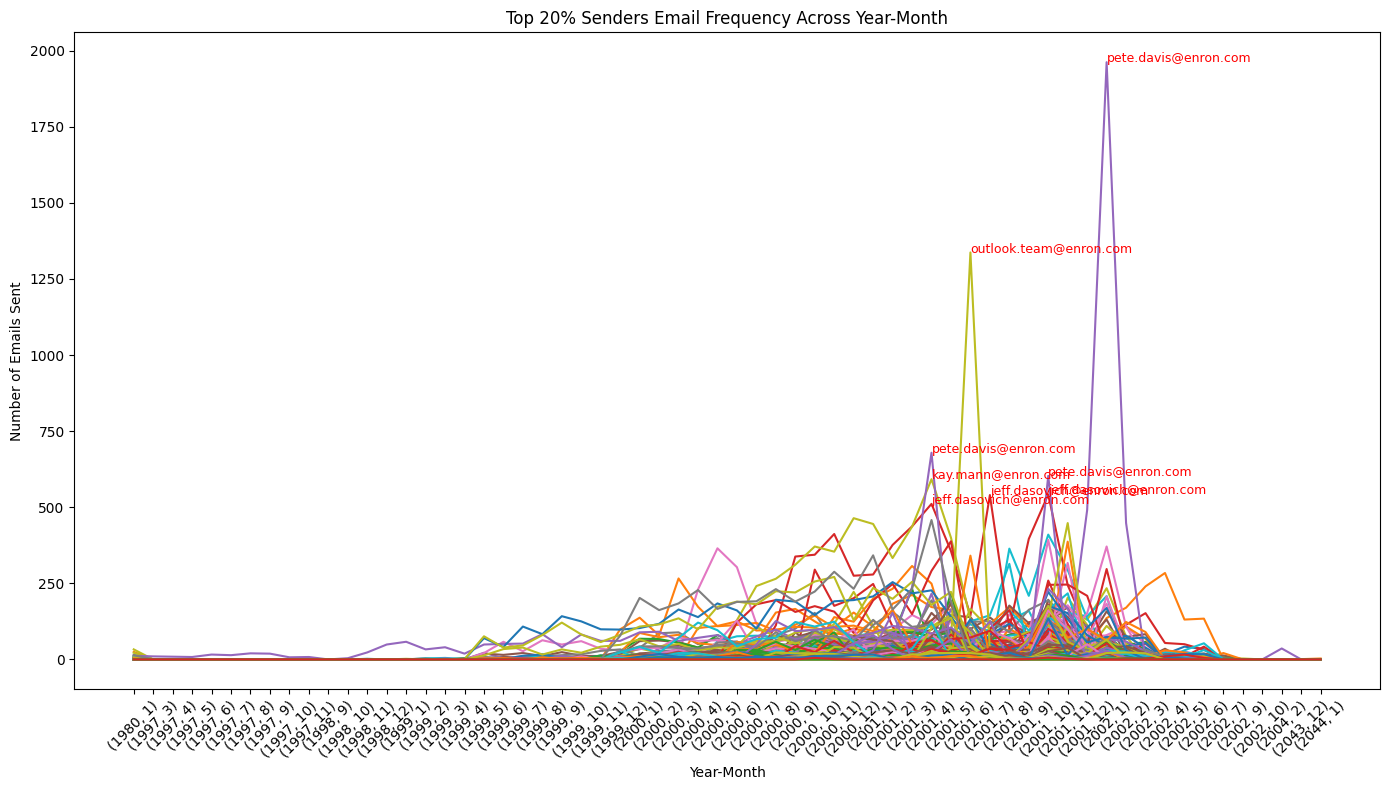

In [33]:
plt.figure(figsize=(14, 8))
for sender in grouped_EDA_senders.columns.drop('Year-Month-code'):
    plt.plot(grouped_EDA_senders['Year-Month-code'], grouped_EDA_senders[sender], label=sender)
#grouped_EDA_senders.plot(kind='line', stacked=False, figsize=(14, 8), legend=False)

# Add labels and title to the plot
plt.title('Top 20% Senders Email Frequency Across Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Emails Sent')
plt.xticks(ticks=grouped_EDA_senders['Year-Month-code'], labels=grouped_EDA_senders.index,rotation=45)
plt.tight_layout()
# Step 8: Add annotations for high email counts (e.g., counts > 50)
high_count_threshold = 500  # Set the threshold for what counts as "high"

# Loop over the dataframe to find points that exceed the threshold
for sender in grouped_EDA_senders.columns.drop('Year-Month-code'):
    for idx, count in enumerate(grouped_EDA_senders[sender]):
        if count > high_count_threshold:
            plt.text(grouped_EDA_senders['Year-Month-code'][idx],count, sender, fontsize=9, color='red', rotation=0)
plt.show()

Need to explore pete davis and outlook.team should be not considered

In [34]:
pete_davis_set = top_senders_df[top_senders_df["From"]=="pete.davis@enron.com"]

In [35]:
pete_davis_set.head()

,From,To,Date,Subject,Body,Year,Month
174240,pete.davis@enron.com,[pete.davis@enron.com],2001-11-29 23:38:22+00:00,Start Date: 11/29/01; HourAhead hour: 14; <CO...,\n\nStart Date: 11/29/01; HourAhead hour: 14; ...,2001,11
174260,pete.davis@enron.com,[pete.davis@enron.com],2001-11-30 01:38:31+00:00,Start Date: 11/29/01; HourAhead hour: 16; <CO...,\n\nStart Date: 11/29/01; HourAhead hour: 16; ...,2001,11
174269,pete.davis@enron.com,[pete.davis@enron.com],2001-10-26 19:38:04+00:00,Start Date: 10/26/01; HourAhead hour: 12; <CO...,\n\nStart Date: 10/26/01; HourAhead hour: 12; ...,2001,10
174276,pete.davis@enron.com,[pete.davis@enron.com],2001-11-30 00:38:41+00:00,Start Date: 11/29/01; HourAhead hour: 15; <CO...,\n\nStart Date: 11/29/01; HourAhead hour: 15; ...,2001,11
191575,pete.davis@enron.com,[pete.davis@enron.com],2002-02-05 13:37:57+00:00,Start Date: 2/5/02; HourAhead hour: 8;,\n\nStart Date: 2/5/02; HourAhead hour: 8; No...,2002,2


In [36]:
pete_davis_set.tail()

,From,To,Date,Subject,Body,Year,Month
496279,pete.davis@enron.com,[pete.davis@enron.com],2002-02-07 09:38:14+00:00,Start Date: 2/7/02; HourAhead hour: 4;,\n\nStart Date: 2/7/02; HourAhead hour: 4; No...,2002,2
496281,pete.davis@enron.com,[pete.davis@enron.com],2002-02-06 22:38:01+00:00,Start Date: 2/6/02; HourAhead hour: 17;,\n\nStart Date: 2/6/02; HourAhead hour: 17; N...,2002,2
496282,pete.davis@enron.com,[pete.davis@enron.com],2002-02-07 00:37:48+00:00,Start Date: 2/6/02; HourAhead hour: 19;,\n\nStart Date: 2/6/02; HourAhead hour: 19; N...,2002,2
496283,pete.davis@enron.com,[pete.davis@enron.com],2002-02-07 03:37:34+00:00,Start Date: 2/6/02; HourAhead hour: 22;,\n\nStart Date: 2/6/02; HourAhead hour: 22; N...,2002,2
496286,pete.davis@enron.com,[pete.davis@enron.com],2002-02-05 06:43:02+00:00,Start Date: 2/5/02; HourAhead hour: 1;,\n\nStart Date: 2/5/02; HourAhead hour: 1; No...,2002,2


Seems an automated message, to  confirm with wordcloud

In [37]:
pete_davis_strings = pete_davis_set.Body.values

In [38]:
CUSTOM_FILTER = [lambda x: x.lower(), strip_punctuation, 
                 strip_multiple_whitespaces, strip_numeric, 
                 remove_stopwords, strip_short]
pete_tokenized = [preprocess_string(x,CUSTOM_FILTER) for x in pete_davis_strings]

In [39]:
import nltk
wn = WordNetLemmatizer()
nltk.download('wordnet')
pete_corpus = [[wn.lemmatize(w) for w in dd ] for dd in pete_tokenized] 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raiag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


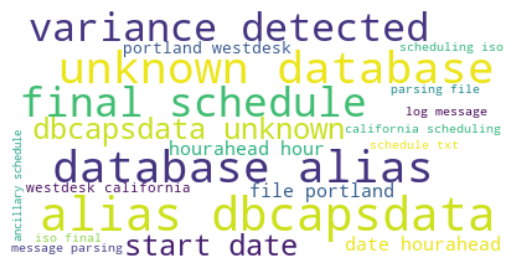

In [40]:
from wordcloud import WordCloud
text_pete = ' '.join([word for sublist in pete_corpus for word in sublist])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white", max_words=20).generate(text_pete)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This looks like a scheduled automated email based on the terms. Removing pete.davis and outlook.teams from the frequency dataset.

In [41]:
top_senders_df = top_senders_df[~top_senders_df["From"].isin(["pete.davis@enron.com","outlook.team@enron.com"])]

In [42]:
top_senders_df.head()

,From,To,Date,Subject,Body,Year,Month
0,msagel@home.com,[jarnold@enron.com],2000-11-16 17:30:00+00:00,Status,John:\n?\nI'm not really sure what happened be...,2000,11
3,jeff.youngflesh@enron.com,"[anthony.gilmore@enron.com, sarah-joy.hunter@e...",2000-11-27 09:49:00+00:00,Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,2000,11
4,caroline.abramo@enron.com,[mike.grigsby@enron.com],2000-12-12 17:33:00+00:00,Harvard Mgmt,Mike- I have their trader coming into the offi...,2000,12
5,klarnold@flash.net,[john.arnold@enron.com],2000-12-12 07:52:00+00:00,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,>Sender: articles-email@ms1.lga2.nytimes.com\n...,2000,12
7,jennifer.fraser@enron.com,"[sarah.mulholland@enron.com, julie.gomez@enron...",2000-11-19 17:34:00+00:00,Fuel Switching,The attached report contains an analysis of fu...,2000,11


C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\3564381598.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(grouped_EDA_senders['Year-Month-code'][idx],count, sender, fontsize=9, color='red', rotation=0)


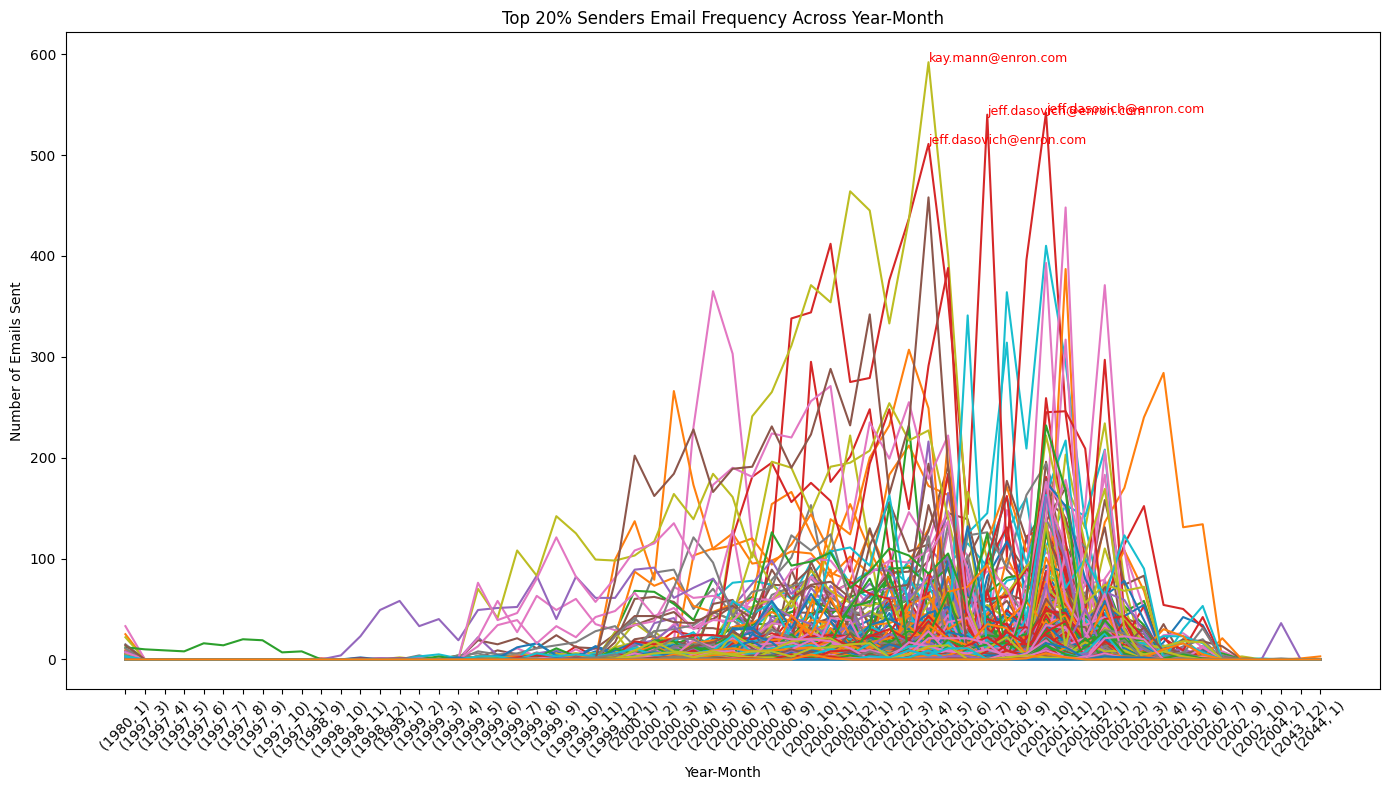

In [43]:
grouped_EDA_senders = top_senders_df.groupby(['Year','Month','From']).size().unstack(fill_value=0)
grouped_EDA_senders['Year-Month'] = list(zip(grouped_EDA_senders.index.get_level_values('Year'), grouped_EDA_senders.index.get_level_values('Month')))
grouped_EDA_senders.set_index('Year-Month', inplace=True)
grouped_EDA_senders['Year-Month-code'] = pd.Categorical(grouped_EDA_senders.index).codes
plt.figure(figsize=(14, 8))
for sender in grouped_EDA_senders.columns.drop('Year-Month-code'):
    plt.plot(grouped_EDA_senders['Year-Month-code'], grouped_EDA_senders[sender], label=sender)
#grouped_EDA_senders.plot(kind='line', stacked=False, figsize=(14, 8), legend=False)

# Add labels and title to the plot
plt.title('Top 20% Senders Email Frequency Across Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Emails Sent')
plt.xticks(ticks=grouped_EDA_senders['Year-Month-code'], labels=grouped_EDA_senders.index,rotation=45)
plt.tight_layout()
# Step 8: Add annotations for high email counts (e.g., counts > 50)
high_count_threshold = 500  # Set the threshold for what counts as "high"

# Loop over the dataframe to find points that exceed the threshold
for sender in grouped_EDA_senders.columns.drop('Year-Month-code'):
    for idx, count in enumerate(grouped_EDA_senders[sender]):
        if count > high_count_threshold:
            plt.text(grouped_EDA_senders['Year-Month-code'][idx],count, sender, fontsize=9, color='red', rotation=0)
plt.show()

Examining the Medium.com enron.csv dataset that has financial information for SOME executive level employees in Enron to see if it gives more insights

In [44]:
enron_financial = pd.read_csv("D:/IND5003/enron_emails_uncleaned/enron_financial_dataset.csv")

In [45]:
enron_financial = enron_financial.fillna(0)
enron_financial.columns

Index(['Unnamed: 0', 'salary', 'to_messages', 'deferral_payments',
       'total_payments', 'loan_advances', 'bonus', 'email_address',
       'restricted_stock_deferred', 'deferred_income', 'total_stock_value',
       'expenses', 'from_poi_to_this_person', 'exercised_stock_options',
       'from_messages', 'other', 'from_this_person_to_poi', 'poi',
       'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock',
       'director_fees'],
      dtype='object')

Seems total_payments, restricted_stock and exercised_stock_options can be useful to gauge hierarchy of employees

In [46]:
top_senders_weighted = pd.merge(top_senders_df,enron_financial[['total_payments','restricted_stock','exercised_stock_options','email_address']],how='left',left_on='From',right_on='email_address')

C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\3549450649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senders_without_nulls['total_payments_category'] = pd.cut(senders_without_nulls['total_payments'], bins=5, labels=False)
C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\3549450649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senders_without_nulls['restricted_stock_category'] = pd.cut(senders_without_nulls['restricted_stock'], bins=5, labels=False)


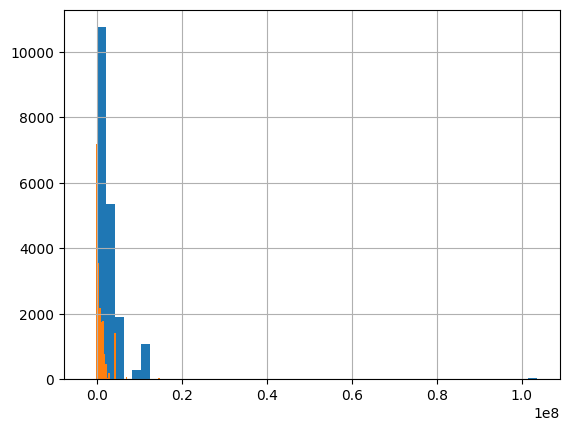

In [47]:
# Separate senders with null values in total_payments or restricted_stock
senders_with_nulls = top_senders_weighted[top_senders_weighted[['total_payments','restricted_stock']].isna().all(axis=1)]
senders_without_nulls = top_senders_weighted.dropna(subset=['total_payments','restricted_stock'])

# Categorize total_payments and restricted_stock for non-null senders
senders_without_nulls['total_payments_category'] = pd.cut(senders_without_nulls['total_payments'], bins=5, labels=False)
senders_without_nulls['restricted_stock_category'] = pd.cut(senders_without_nulls['restricted_stock'], bins=5, labels=False)
#senders_without_nulls['total_payments_category'].unique()
#print(senders_without_nulls['total_payments'].describe())

# Plot histogram to visualize the distribution
senders_without_nulls['total_payments'].hist(bins=50)
senders_without_nulls['restricted_stock'].hist(bins=50) ####data is completely skewed by Kenneth Lay high total payments. hence a combined category is explored for better segmentation of data
plt.show()
#senders_without_nulls['restricted_stock_category'] = pd.cut(senders_without_nulls['restricted_stock'], bins=5, labels=False)

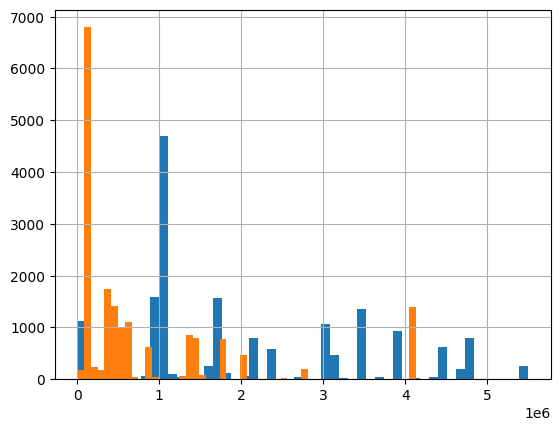

In [48]:
#Study Outliers based on Payments for better classification. 
Q1 = senders_without_nulls['total_payments'].quantile(0.25)
Q3 = senders_without_nulls['total_payments'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
senders_without_nulls = senders_without_nulls[(senders_without_nulls['total_payments'] >= lower_bound) & (senders_without_nulls['total_payments'] <= upper_bound)]
senders_without_nulls['total_payments'].hist(bins=50)
senders_without_nulls['restricted_stock'].hist(bins=50)
senders_without_nulls['total_payments_category'] = pd.cut(senders_without_nulls['total_payments'], bins=5, labels=False)
senders_without_nulls['restricted_stock_category'] = pd.cut(senders_without_nulls['restricted_stock'], bins=5, labels=False)

In [49]:
senders_without_nulls

,From,To,Date,Subject,Body,Year,Month,total_payments,restricted_stock,exercised_stock_options,email_address,total_payments_category,restricted_stock_category
176,greg.piper@enron.com,[john.arnold@enron.com],2001-10-22 12:28:17+00:00,Re:,I think it went well. I am in Florida today an...,2001,10,1737629.0,409554.0,880290.0,greg.piper@enron.com,1,0
494,louise.kitchen@enron.com,[john.arnold@enron.com],2001-10-24 18:05:03+00:00,Don't need to call me back,Sorry I completely forgot it was Wednesday,2001,10,3471141.0,466101.0,81042.0,louise.kitchen@enron.com,3,0
500,sally.beck@enron.com,"[brad.carey@enron.com, robert.bogucki@enron.co...",2001-10-05 21:03:57+00:00,Enron Center South (ECS) Move Back-up Plan,\n\n\nA backup seat and a backup computer have...,2001,10,969068.0,126027.0,0.0,sally.beck@enron.com,0,0
703,louise.kitchen@enron.com,"[scott.neal@enron.com, mike.grigsby@enron.com,...",2001-12-27 22:58:02+00:00,Re-start/Integration Planning,We have for the last couple of weeks started t...,2001,12,3471141.0,466101.0,81042.0,louise.kitchen@enron.com,3,0
731,louise.kitchen@enron.com,"[tim.heizenrader@enron.com, peggy.hedstrom@enr...",2001-12-31 18:53:43+00:00,NETCO,The New Year has arrived and we really to fina...,2001,12,3471141.0,466101.0,81042.0,louise.kitchen@enron.com,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221510,tim.belden@enron.com,"[tim.heizenrader@enron.com, matt.motley@enron....",2001-12-29 01:03:22+00:00,Mandatory Planning Meeting - Training Sessions,Please plan on attending a meeting on Wednesda...,2001,12,5501630.0,157569.0,953136.0,tim.belden@enron.com,4,0
221511,tim.belden@enron.com,[center.dl-portland@enron.com],2001-08-27 20:38:43+00:00,Data Retention Reminder,"As most people are aware, there are a variety ...",2001,8,5501630.0,157569.0,953136.0,tim.belden@enron.com,4,0
221663,tim.belden@enron.com,"[diana.scholtes@enron.com, sean.crandall@enron...",2001-07-21 00:52:53+00:00,FW: Portland General Electric: Order Rejectin...,\n\n -----Original Message-----\nFrom: \tSteff...,2001,7,5501630.0,157569.0,953136.0,tim.belden@enron.com,4,0
221756,tim.belden@enron.com,"[diana.scholtes@enron.com, robert.badeer@enron...",2001-04-04 01:02:00+00:00,WSCC Reserve Standard,fyi\n---------------------- Forwarded by Tim B...,2001,4,5501630.0,157569.0,953136.0,tim.belden@enron.com,4,0


In [50]:
# Combine categories to create a color magnitude for each sender using a simple sum
senders_without_nulls['combined_category'] = senders_without_nulls['total_payments_category'] + senders_without_nulls['restricted_stock_category']
senders_without_nulls['classified'] = senders_without_nulls['combined_category'].rank(method='dense').astype(int) - 1 # Rank and shift to start from 0 
senders_without_nulls.classified.unique()

array([1, 3, 0, 4, 2, 5, 6])

In [51]:
grouped_non_null = senders_without_nulls.groupby(['Year','Month', 'From']).size().reset_index(name='email_count')
grouped_null = senders_with_nulls.groupby(['Year','Month', 'From']).size().reset_index(name='email_count')

In [52]:
grouped_non_null

,Year,Month,From,email_count
0,1980,1,david.delainey@enron.com,1
1,1980,1,greg.whalley@enron.com,1
2,1980,1,jeffrey.shankman@enron.com,2
3,1980,1,mark.haedicke@enron.com,4
4,1980,1,phillip.allen@enron.com,7
...,...,...,...,...
877,2002,3,rod.hayslett@enron.com,1
878,2002,3,stanley.horton@enron.com,3
879,2002,3,vicki.sharp@enron.com,2
880,2002,5,dan.leff@enron.com,1


In [53]:
grouped_non_null['Year-Month'] = list(zip(grouped_non_null["Year"], grouped_non_null["Month"]))
grouped_non_null.set_index('Year-Month', inplace=True)
grouped_non_null['Year-Month-code'] = pd.Categorical(grouped_non_null.index).codes
grouped_null['Year-Month'] = list(zip(grouped_null["Year"],grouped_null["Month"]))
grouped_null.set_index('Year-Month', inplace=True)
grouped_null['Year-Month-code'] = pd.Categorical(grouped_null.index).codes
# Create a color map for the categorical data of non-null senders

In [54]:
colors = plt.cm.viridis(np.linspace(0, 1, len(senders_without_nulls['classified'].unique())))
senders_without_nulls['classified'].unique()

array([1, 3, 0, 4, 2, 5, 6])

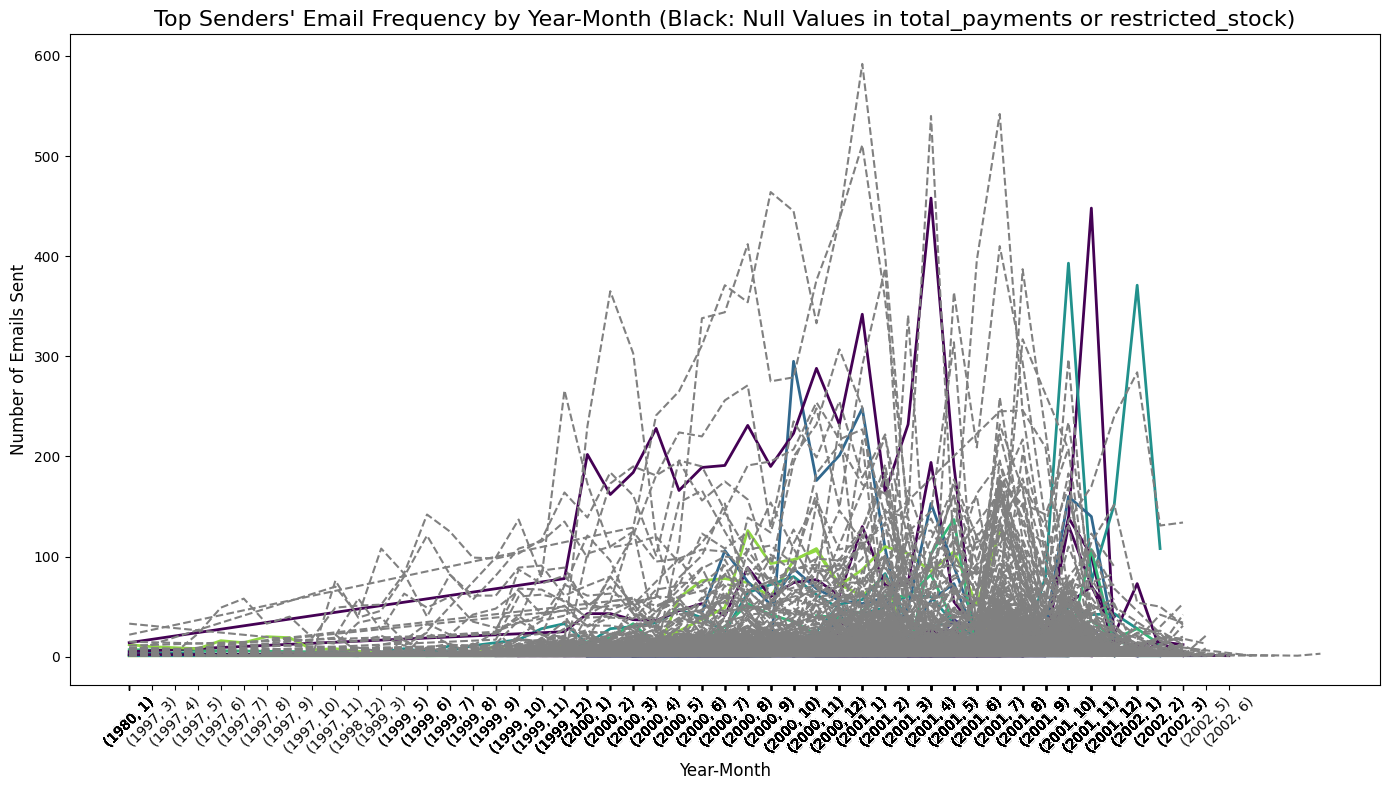

In [55]:
# Set up the figure
plt.figure(figsize=(14, 8))

# Plot each sender who has non-null total_payments and restricted_stock
for sender in grouped_non_null['From'].unique():
    sender_data = grouped_non_null[grouped_non_null['From'] == sender]
    category = senders_without_nulls[senders_without_nulls['From'] == sender]['classified'].iloc[0]  # Get combined category for the sender
    
    plt.plot(sender_data['Year-Month-code'], sender_data['email_count'], label=sender, color=colors[category], linewidth=2)
    plt.xticks(ticks = sender_data['Year-Month-code'],labels=sender_data.index, rotation=45)
# Plot each sender with null values in total_payments or restricted_stock in black
for sender in grouped_null['From'].unique():
    sender_data = grouped_null[grouped_null['From'] == sender]
    plt.plot(sender_data['Year-Month-code'], sender_data['email_count'], color='grey', linewidth=1.5, linestyle='--', label=f"{sender} (null)")
    
# Rotate x-axis labels for better readability
#plt.xticks(ticks = sender_data['Year-Month-code'],labels=sender_data.index, rotation=45)
plt.xticks(ticks = grouped_non_null['Year-Month-code'],labels=grouped_non_null.index, rotation=45)
# Add titles and labels
plt.title("Top Senders' Email Frequency by Year-Month (Black: Null Values in total_payments or restricted_stock)", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Emails Sent", fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()

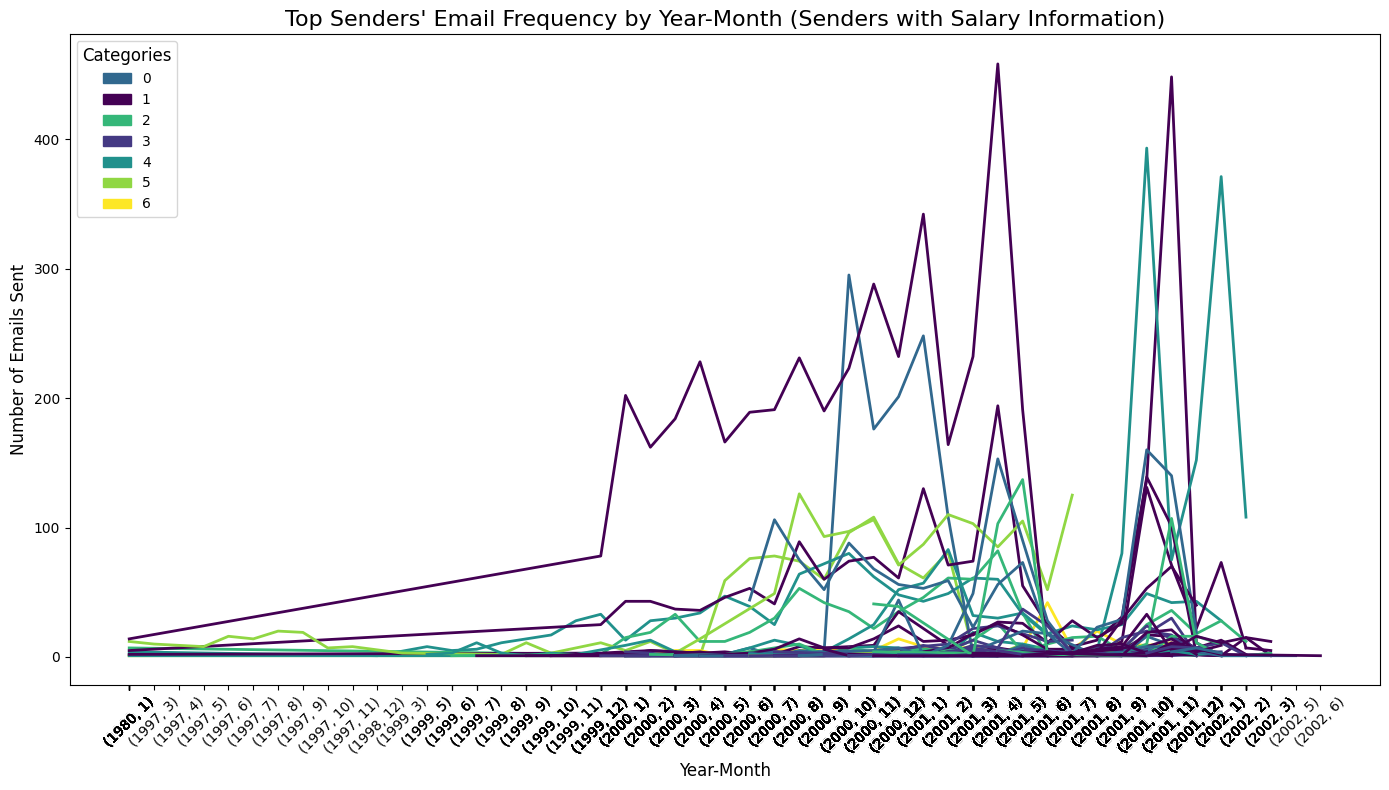

In [56]:
import matplotlib.patches as mpatches
# Set up the figure
categories = senders_without_nulls['classified'].unique()
plt.figure(figsize=(14, 8))
sorted_categories_colors = sorted(zip(categories, colors), key=lambda x: x[0])
sorted_categories, sorted_colors = zip(*sorted_categories_colors)
# Plot each sender who has non-null total_payments and restricted_stock
for sender in grouped_non_null['From'].unique():
    sender_data = grouped_non_null[grouped_non_null['From'] == sender]
    category = senders_without_nulls[senders_without_nulls['From'] == sender]['classified'].iloc[0]  # Get combined category for the sender
    
    plt.plot(sender_data['Year-Month-code'], sender_data['email_count'], label=sender, color=colors[category], linewidth=2)
    #plt.xticks(ticks = sender_data['Year-Month-code'],labels=sender_data.index, rotation=45)

    
# Rotate x-axis labels for better readability
#plt.xticks(ticks = sender_data['Year-Month-code'],labels=sender_data.index, rotation=45)
plt.xticks(ticks = grouped_non_null['Year-Month-code'],labels=grouped_non_null.index, rotation=45)
# Add titles and labels
plt.title("Top Senders' Email Frequency by Year-Month (Senders with Salary Information)", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Emails Sent", fontsize=12)
legend_handles = [mpatches.Patch(color=sorted_colors[i], label=sorted_categories[i]) for i in range(len(sorted_categories))]
plt.legend(handles=legend_handles, title="Categories", fontsize=10, title_fontsize=12, loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

In [60]:
senders_without_nulls[senders_without_nulls["combined_category"] >= 6].From.unique()
senders_without_nulls[senders_without_nulls["combined_category"] >= 3].From.unique()

array(['louise.kitchen@enron.com', 'tim.belden@enron.com',
       'stanley.horton@enron.com', 'jim.fallon@enron.com',
       'john.sherriff@enron.com', 'rick.buy@enron.com',
       'david.delainey@enron.com', 'phillip.allen@enron.com',
       'ken.rice@enron.com', 'richard.causey@enron.com',
       'steven.kean@enron.com', 'larry.izzo@enron.com',
       'mark.haedicke@enron.com', 'jeffrey.mcmahon@enron.com',
       'andrew.fastow@enron.com', 'greg.whalley@enron.com'], dtype=object)

Network Graph (Email Connections)


In [61]:
import plotly.graph_objects as go
import networkx as nx
from collections import Counter
from community import community_louvain

In [75]:


top_senders_df["To"] = top_senders_df['To'].apply(lambda x: x.split(",") if isinstance(x, str) else x)
top_senders_df = top_senders_df.explode('To')
# Group by From and To to get the email count for each unique pair
email_counts = top_senders_df.groupby(['From', 'To']).size().reset_index(name='weight')
email_counts.head()

,From,To,weight
0,-nikole@excite.com,bill.williams@enron.com,8
1,1.10043390.-2@multexinvestornetwork.com,jwillia@enron.com,37
2,1.10043390.-3@multexinvestornetwork.com,jwillia@enron.com,6
3,1.10969419.-2@multexinvestornetwork.com,harry.arora@enron.com,11
4,1.11176403.-2@multexinvestornetwork.com,alewis@ect.enron.com,12


C:\Users\raiag\AppData\Local\Temp\ipykernel_36480\4116933542.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = top_senders_df.groupby('From').apply(lambda x: x.sample(frac=0.01, random_state=42)).reset_index(drop=True)


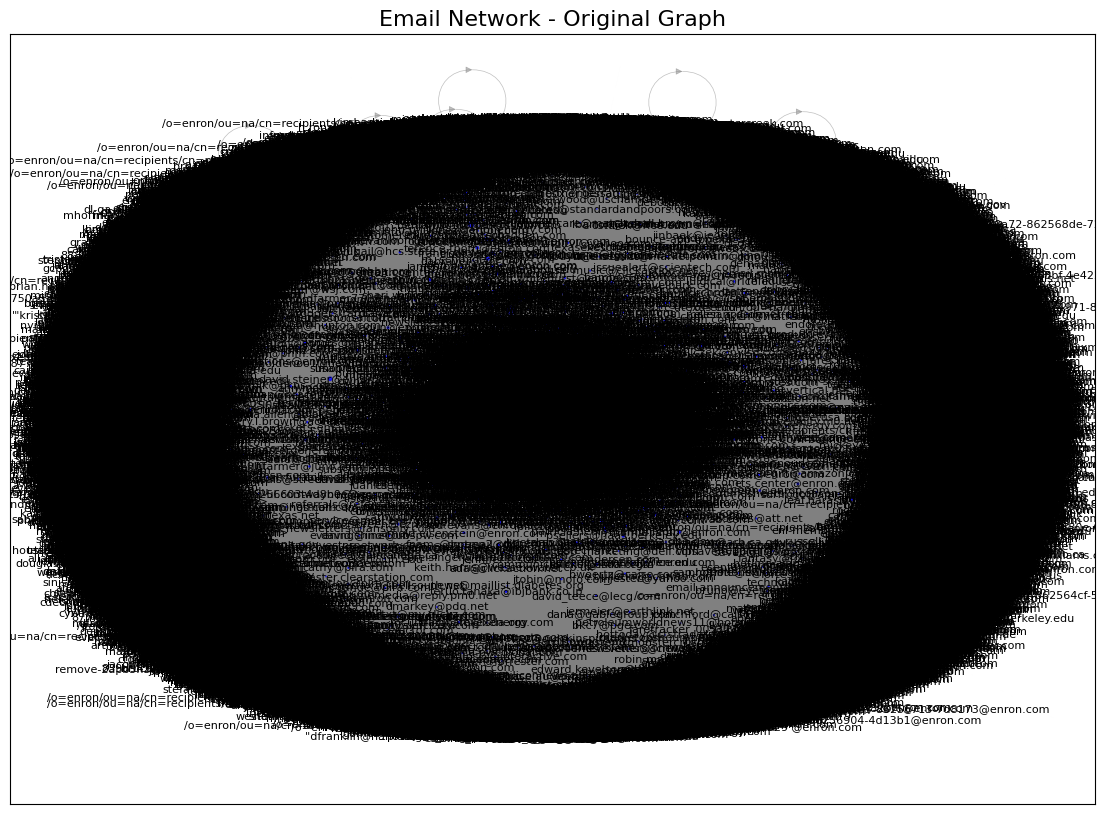

In [237]:

G = nx.DiGraph()
# Add edges with weights (number of emails sent)
for index, row in email_counts.iterrows():
    sender = row['From']
    recipient = row['To']
    weight = row['weight']
    G.add_edge(sender, recipient, weight=weight)
# Add node attributes for the number of unique recipients each sender has contacted
node_weights = top_senders_df.groupby('From')['To'].nunique().to_dict()
nx.set_node_attributes(G, node_weights, 'node_weight')


# Calculate centrality measures for the original graph
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Set centrality as node attributes for visualization
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')

# Visualize the network using NetworkX
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Draw the original graph with node size based on degree centrality
node_sizes = [5000 * degree_centrality[node] for node in G.nodes()]
pos = nx.spring_layout(G)  # Use a spring layout for better visualization
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.7, node_color='blue')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Email Network - Original Graph", fontsize=16)
plt.show()

Hmm very ugly an dense need to simplify dataset for visualization. 

This line below samples 1% of the data for each unique sender-recipient pair from the top_senders_df DataFrame, effectively reducing the dataset size while still maintaining the original proportion of emails for each group. The result is stored in sampled_df, which contains a random subset of emails while preserving the overall distribution of sender-recipient relationships.

Desire is to 
Reduces Data Size: Helps in reducing the size of the dataset for faster analysis.
Maintains Proportional Representation: Ensures that each sender-recipient pair is proportionally represented in the sampled data.
Reproducibility: Setting a random_state ensures that the random sampling is reproducible, which is useful for consistent analysis.

In [83]:
# Step 5: Analyze Sampled Graph
# You can repeat similar analysis for the sampled graph
# Sample 1% of the original data for each sender provided it wasnt just a single communication
filtered_df = top_senders_df.groupby(['From', 'To']).filter(lambda x: len(x) > 1)

In [84]:
sampled_df = filtered_df.groupby(['From','To']).apply(lambda x: x.sample(frac=0.01, random_state=42)).reset_index(drop=True)

C:\Users\raiag\AppData\Local\Temp\ipykernel_36260\909947839.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [89]:
sampled_df.head()
sampled_email_counts = sampled_df.groupby(['From', 'To']).size().reset_index(name="weight")
sampled_email_counts.head()
#sampled_email_counts.weight.max()

,From,To,weight
0,40enron@enron.com,,6
1,a..howard@enron.com,rod.hayslett@enron.com,1
2,abcnewsnow-editor@mail.abcnews.go.com,abcnews-l@list1.starwave.com,1
3,adam.johnson@enron.com,andy.zipper@enron.com,1
4,adam.johnson@enron.com,jennifer.denny@enron.com,1


In [90]:
# Create a new graph from the sampled dataset
#sampled_email_counts = sampled_df.groupby(['From', 'To']).size().reset_index()
sampled_G = nx.DiGraph()

for index, row in sampled_email_counts.iterrows():
    sender = row['From']
    recipient = row['To']
    weight = row['weight']
    sampled_G.add_edge(sender, recipient, weight=weight)

filtered_edges = [(u, v) for u, v, d in sampled_G.edges(data=True) if d['weight'] > 0 ]
H = sampled_G.edge_subgraph(filtered_edges).copy()

# Community detection using Louvain method
communities = community_louvain.best_partition(H.to_undirected())
sampled_degree_centrality = nx.degree_centrality(H)
sampled_betweenness_centrality = nx.betweenness_centrality(H)
# Assign community as a node attribute for visualization
nx.set_node_attributes(H, communities, 'community')
nx.set_node_attributes(H, sampled_degree_centrality, 'degree_centrality')
nx.set_node_attributes(H, sampled_betweenness_centrality, 'betweenness_centrality')
filtered_edges

[('40enron@enron.com', ''),
 ('a..howard@enron.com', 'rod.hayslett@enron.com'),
 ('rod.hayslett@enron.com', 'a..howard@enron.com'),
 ('rod.hayslett@enron.com', 'james.saunders@enron.com'),
 ('rod.hayslett@enron.com', 'tracy.geaccone@enron.com'),
 ('abcnewsnow-editor@mail.abcnews.go.com', 'abcnews-l@list1.starwave.com'),
 ('adam.johnson@enron.com', 'andy.zipper@enron.com'),
 ('adam.johnson@enron.com', 'jennifer.denny@enron.com'),
 ('adam.johnson@enron.com', 'jennifer.rosado@enron.com'),
 ('adam.johnson@enron.com', 'tara.sweitzer@enron.com'),
 ('adam.johnson@enron.com', 'torrey.moorer@enron.com'),
 ('aimee.lannou@enron.com', 'daren.farmer@enron.com'),
 ('daren.farmer@enron.com', 'aimee.lannou@enron.com'),
 ('al@friedwire.com', 'eric.saibi@enron.com'),
 ('al@friedwire.com', 'juan.padron@enron.com'),
 ('al@friedwire.com', 'kevin.cline@enron.com'),
 ('al@friedwire.com', 'ryan.williams@enron.com'),
 ('al@friedwire.com', 'seung-taek.oh@enron.com'),
 ('al@friedwire.com', 'thomas.lowell@enron.c

In [114]:
degree_dict = dict(H.degree())
top_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:200]
top_nodes_set = set(node for node,degree in top_nodes)
subgraph = H.subgraph(top_nodes_set).copy()
communities = community_louvain.best_partition(subgraph.to_undirected())
sampled_degree_centrality = nx.degree_centrality(subgraph)
sampled_betweenness_centrality = nx.betweenness_centrality(subgraph)
#sampled_degree_centrality
#degree_dict

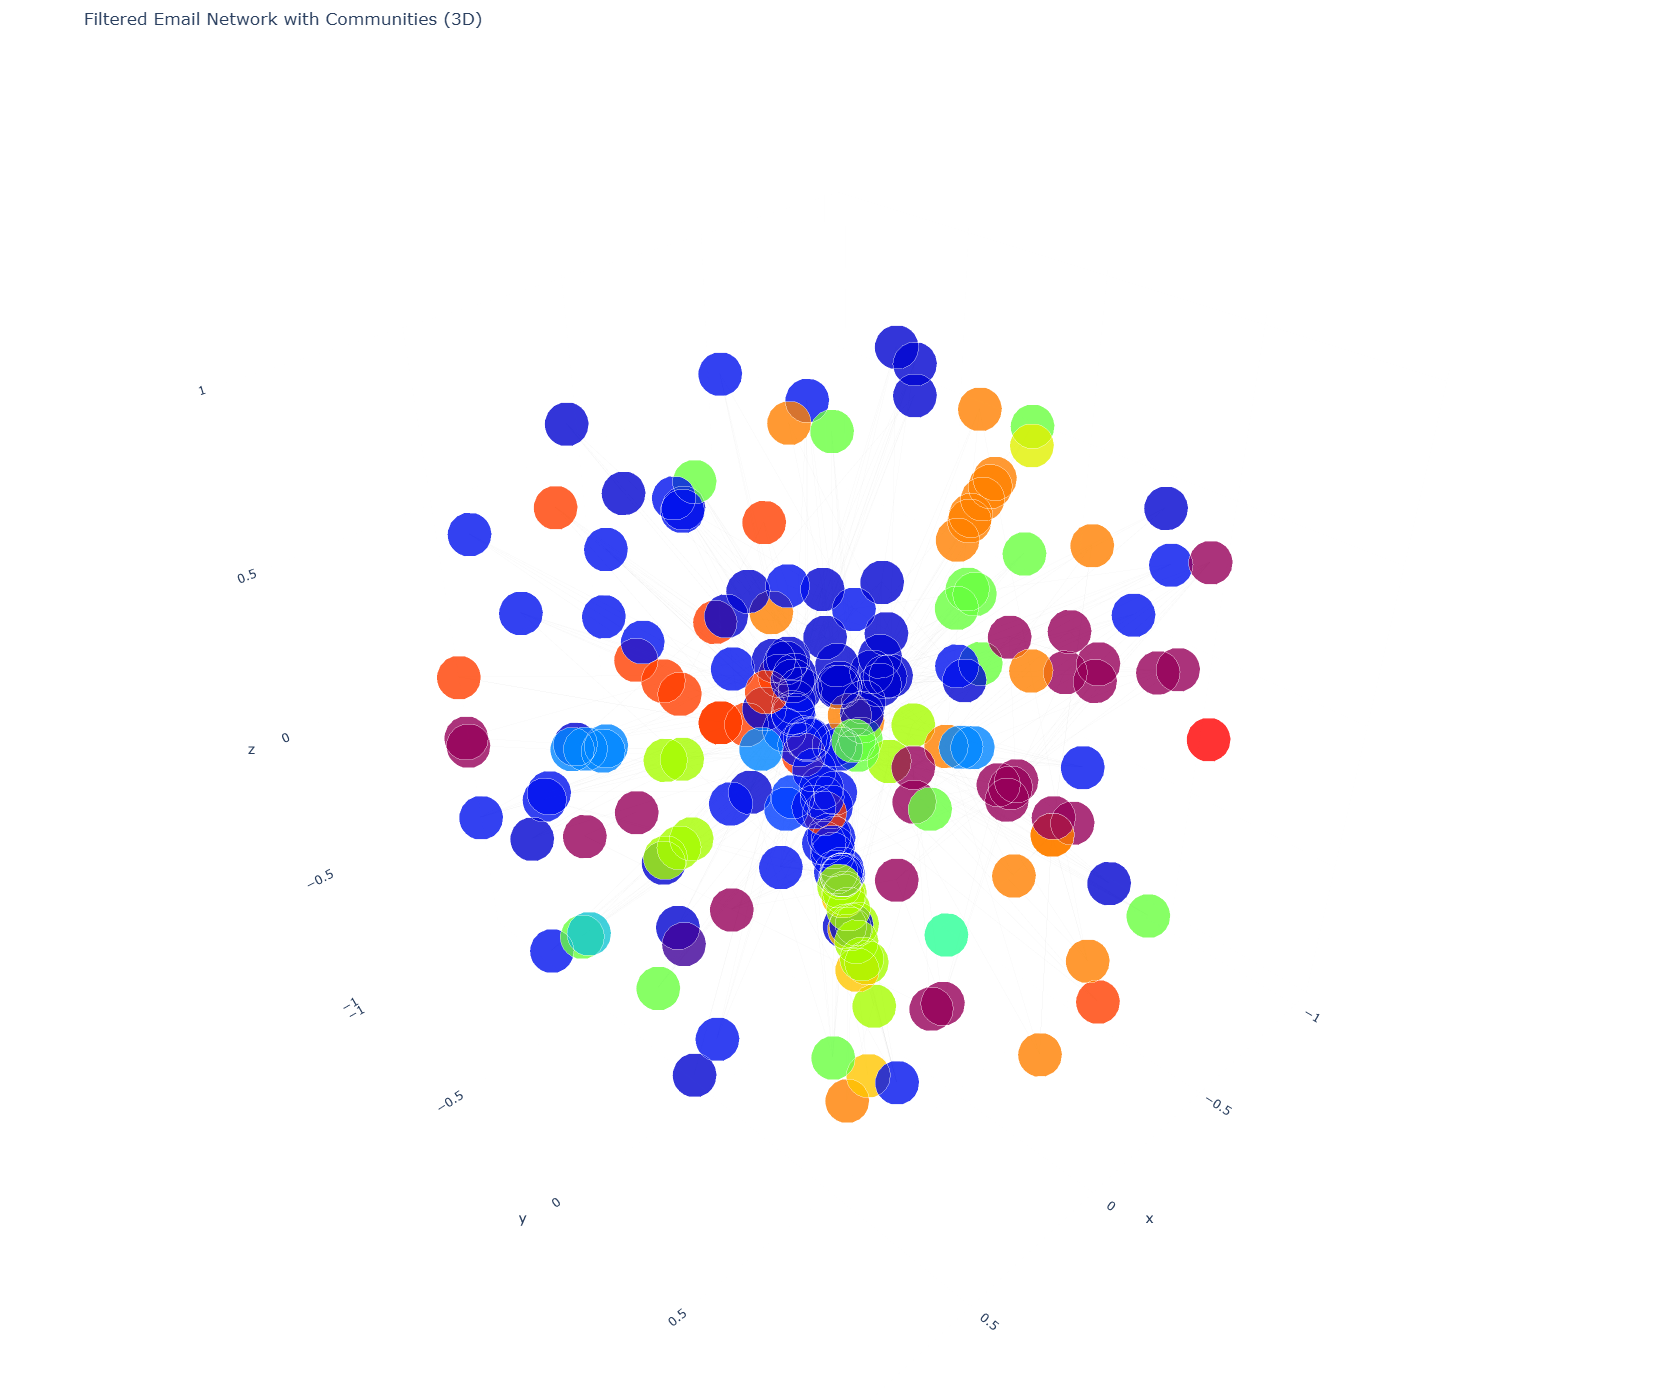

<Figure size 1400x1000 with 0 Axes>

In [115]:
# Assign community as a node attribute for visualization
nx.set_node_attributes(subgraph, communities, 'community')
nx.set_node_attributes(subgraph, sampled_degree_centrality, 'degree_centrality')
nx.set_node_attributes(subgraph, sampled_betweenness_centrality, 'betweenness_centrality')

# Visualize the sampled graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(subgraph,dim=3, seed=42)
# Node positions for 3D visualization
node_x = [pos[node][0] for node in subgraph.nodes()]
node_y = [pos[node][1] for node in subgraph.nodes()]
node_z = [pos[node][2] for node in subgraph.nodes()]
# Edge coordinates for 3D plotting
edge_x = []
edge_y = []
edge_z = []
for edge in subgraph.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # Separate edges with None
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    edge_z.append(z0)
    edge_z.append(z1)
    edge_z.append(None)
# Node size based on degree (number of connections)
node_sizes = [min(200 + 20 * subgraph.degree(n), 50) for n in subgraph.nodes()]
#node_sizes = 50
# Color nodes based on community
node_colors = [communities.get(node) for node in subgraph.nodes()]
# Plot edges as lines
edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color='gray', width=1),
    opacity=0.05,
    hoverinfo='none'
)
# Plot nodes as scatter points
node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers',
    marker=dict(
        size=node_sizes,  # Scale node size
        color=node_colors,  # Color by community
        colorscale='Rainbow',
        opacity=0.8,
        line_width=2
    ),
    text=[f'Node {node}<br>Degree Centrality: {sampled_degree_centrality[node]:.3f}<br>Betweenness: {sampled_betweenness_centrality[node]:.3f}' for node in subgraph.nodes()],  # Hover text (you can use real email IDs here if needed)
    hoverinfo='text'
)
#node_sizes_sampled = [5000 * sampled_degree_centrality[node] for node in H.nodes()]
#pos_sampled = nx.spring_layout(H)
#nx.draw_networkx_nodes(H, pos_sampled, node_size=node_sizes_sampled, alpha=0.7, node_color='green')
#nx.draw_networkx_edges(H, pos_sampled, width=0.5, alpha=0.5, edge_color='gray')
#nx.draw_networkx_labels(H, pos_sampled, font_size=8)

#plt.title("Email Network - Sampled Graph", fontsize=16)
#plt.show()
# Create 3D plot
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Filtered Email Network with Communities (3D)',
                    showlegend=False,
                    hovermode='closest',
                    width = 1400,
                    height = 1400,
                    margin=dict(b=0, l=0, r=0, t=50),
                    scene=dict(
                        xaxis=dict(showbackground=False),
                        yaxis=dict(showbackground=False),
                        zaxis=dict(showbackground=False)
                    )
                ))

fig.show()

In [97]:
subgraph.nodes()

NodeView(('', 'debra.perlingiere@enron.com', 'brant.reves@enron.com', 'jdasovic@enron.com', 'holly.keiser@enron.com', 'laurel.adams@enron.com', 'craig.buehler@enron.com', 'al@friedwire.com', 'andrea.dahlke@enron.com', 'andy.zipper@enron.com', 'dave.perrino@enron.com', 'janel.guerrero@enron.com', 'ray.alvarez@enron.com', 'john.shelk@enron.com', 'sarah.novosel@enron.com', 'leslie.reeves@enron.com', 'molly.harris@enron.com', 'kevin.hyatt@enron.com', 'chris.germany@enron.com', 'kysa.alport@enron.com', 'leonardo.pacheco@enron.com', 'elizabeth.sager@enron.com', 'mona.petrochko@enron.com', 'jan.moore@enron.com', 'russell.diamond@enron.com', 'kevin.cline@enron.com', 'tanya.rohauer@enron.com', 'lisa.lees@enron.com', 'tom.moran@enron.com', 'veronica.espinoza@enron.com', 'kenny.soignet@enron.com', 'f..calger@enron.com', 'sara.shackleton@enron.com', 'tk.lohman@enron.com', 'joe.hartsoe@enron.com', 'leslie.lawner@enron.com', 'juan.padron@enron.com', 'mjones7@txu.com', 'phillip.platter@enron.com', 'd

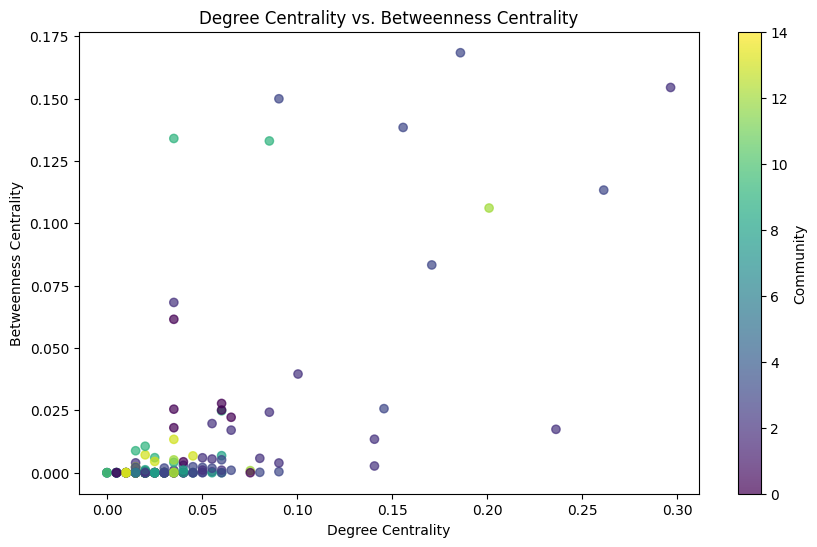

In [116]:
import matplotlib.pyplot as plt

# Extract the centrality measures from the subgraph
degree_centrality_values = [subgraph.nodes[node]['degree_centrality'] for node in subgraph.nodes()]
betweenness_centrality_values = [subgraph.nodes[node]['betweenness_centrality'] for node in subgraph.nodes()]
communities = [subgraph.nodes[node]['community'] for node in subgraph.nodes()]

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(degree_centrality_values, betweenness_centrality_values, c=communities, cmap='viridis', alpha=0.7)

# Add color bar to show community
plt.colorbar(scatter, label='Community')

# Add labels and title
plt.xlabel('Degree Centrality')
plt.ylabel('Betweenness Centrality')
plt.title('Degree Centrality vs. Betweenness Centrality')

# Show plot
plt.show()

The plot shows the relationship between degree centrality (x-axis) and betweenness centrality (y-axis) for nodes (email addresses) in the Enron email network, colored by community. 

Interpretation of the Plot:
Degree Centrality:

Degree centrality measures the number of direct connections a node (email address) has in the network.
High degree centrality indicates individuals who have a large number of direct email connections. In the context of the Enron scandal, these could represent people who communicated frequently with others, potentially having a significant role in information flow within the organization.
Betweenness Centrality:

Betweenness centrality measures the extent to which a node lies on the shortest path between other nodes. It indicates the ability of a person to act as a "broker" or intermediary in the network.
Nodes with high betweenness centrality could represent individuals who facilitated communication between different groups, suggesting they may have played a key role in disseminating information or controlling the flow of communication.
Clusters (Communities):

The color of each point represents the community detected in the network. These communities could indicate departments, teams, or workgroups within Enron.
Nodes within the same community may belong to the same organizational unit or work closely together. Distinct clusters may reflect different departments, such as trading, legal, or management.
Relating to the Enron Scandal:
High Degree and Low Betweenness:

Individuals with high degree centrality but low betweenness centrality may be heavily involved in routine communication (e.g., sending frequent updates or announcements) but are not crucial in connecting different parts of the network.
High Betweenness and High Degree:

These individuals could be key figures who not only communicated widely but also played a crucial role in bridging different parts of the organization. In the context of the Enron scandal, these could be executives, traders, or other influential employees who were pivotal in facilitating information flow across various departments.
Low Degree and High Betweenness:

If any nodes have low degree but high betweenness, they could represent individuals who act as connectors or brokers, relaying information between otherwise disconnected groups. Such roles might indicate people who facilitated communication between different levels of management or acted as intermediaries in crucial communications.

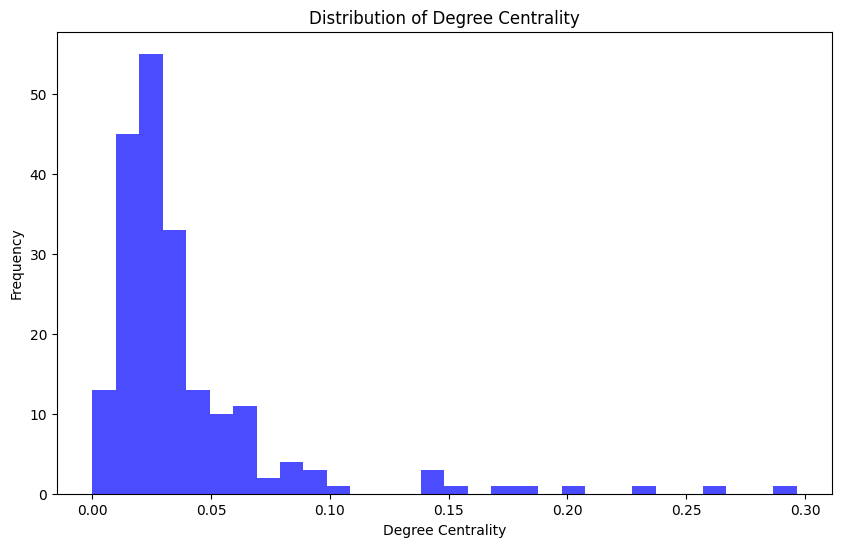

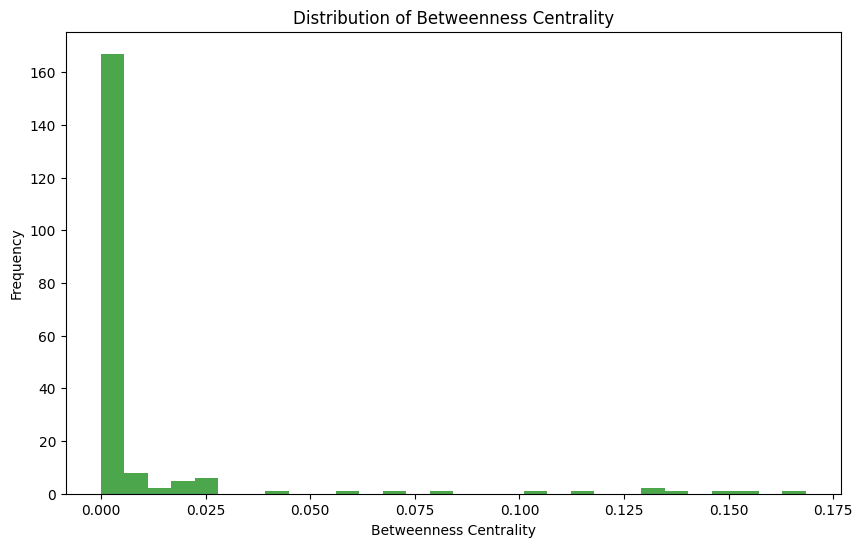

In [117]:
# Plot histogram of degree centrality
plt.figure(figsize=(10, 6))
plt.hist(degree_centrality_values, bins=30, color='blue', alpha=0.7)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Centrality')
plt.show()

# Plot histogram of betweenness centrality
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality_values, bins=30, color='green', alpha=0.7)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Betweenness Centrality')
plt.show()

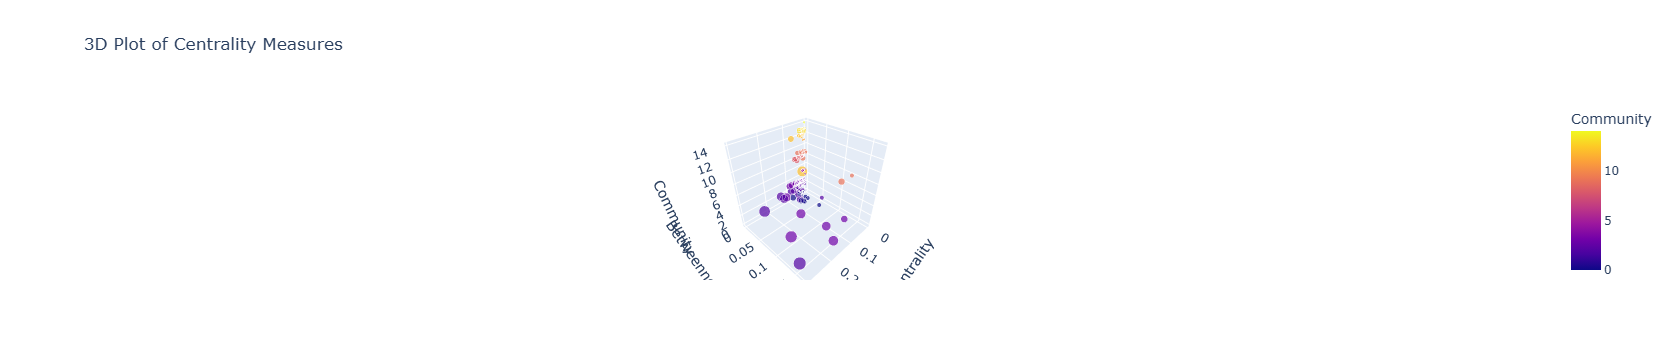

In [118]:
import plotly.express as px
import pandas as pd

# Prepare the data for plotting
data = {
    'Node': list(subgraph.nodes()),
    'Degree Centrality': degree_centrality_values,
    'Betweenness Centrality': betweenness_centrality_values,
    'Community': communities
}
df = pd.DataFrame(data)

# Create a 3D scatter plot
fig = px.scatter_3d(df, x='Degree Centrality', y='Betweenness Centrality', z='Community',
                    color='Community', size='Degree Centrality', title='3D Plot of Centrality Measures')

# Show the figure
fig.show()

In [119]:
# Sort nodes by degree centrality
top_50_degree = sorted(subgraph.nodes(data=True), key=lambda x: x[1]['degree_centrality'], reverse=True)[:50]

# Sort nodes by betweenness centrality
top_50_betweenness = sorted(subgraph.nodes(data=True), key=lambda x: x[1]['betweenness_centrality'], reverse=True)[:50]

# Create DataFrames for easier viewing
import pandas as pd

degree_df = pd.DataFrame([(node, attrs['degree_centrality'], attrs['community']) for node, attrs in top_50_degree],
                         columns=['Email', 'Degree Centrality', 'Community'])
betweenness_df = pd.DataFrame([(node, attrs['betweenness_centrality'], attrs['community']) for node, attrs in top_50_betweenness],
                              columns=['Email', 'Betweenness Centrality', 'Community'])

print("Top 50 Senders by Degree Centrality:")
print(degree_df)

print("\nTop 50 Senders by Betweenness Centrality:")
print(betweenness_df)

Top 50 Senders by Degree Centrality:
                          Email  Degree Centrality  Community
0       jeff.dasovich@enron.com           0.296482          2
1          tana.jones@enron.com           0.261307          3
2          susan.mara@enron.com           0.236181          2
3       rhonda.denton@enron.com           0.201005         12
4     stephanie.panus@enron.com           0.185930          3
5     sara.shackleton@enron.com           0.170854          3
6      cheryl.johnson@enron.com           0.155779          3
7   veronica.espinoza@enron.com           0.145729          3
8         alan.comnes@enron.com           0.140704          2
9      ginger.dernehl@enron.com           0.140704          2
10      james.steffes@enron.com           0.100503          2
11          mary.cook@enron.com           0.090452          3
12        mark.taylor@enron.com           0.090452          3
13      miyung.buster@enron.com           0.090452          2
14    richard.shapiro@enron.com  

Jeff Dasovich was a Director of Regulatory Affairs at Enron. He played a key role in the company's government affairs and regulatory strategy, particularly related to the energy industry. His work primarily involved dealing with regulatory bodies and policymakers, including efforts to shape policies and regulations that would benefit Enron's business interests.

Role at Enron:
Government and Regulatory Affairs: Dasovich's work often focused on regulatory issues and policies related to energy markets. He was involved in lobbying efforts to influence energy regulation, including policies on electricity deregulation and market rules that would favor Enron’s trading operations.
California Energy Crisis: During the early 2000s, particularly around the time of the California energy crisis, Jeff Dasovich was one of the key figures involved in Enron's communications with state regulators and officials. Enron was implicated in strategies that took advantage of deregulated electricity markets, which contributed to significant market manipulation and price spikes in California.

Explanation for High Degree Centrality:
As a Director of Regulatory Affairs, Dasovich likely interacted with various teams and individuals across the organization. His role would have required frequent communication with legal teams, executives, traders, and other regulatory affairs personnel.
During the California energy crisis, Enron's regulatory affairs team would have been heavily involved in responding to the situation, coordinating with different departments to manage the company's position and strategy. This would naturally increase his communication volume.
His involvement in lobbying efforts and regulatory strategy would also require regular interaction with multiple stakeholders, including internal staff, external consultants, and regulators, leading to a high number of connections in the email network.

Explanation for High Betweenness Centrality:
Given his position in regulatory affairs, Dasovich likely acted as a liaison between Enron's legal team, executives, traders, and external regulatory bodies. This bridging role would naturally increase his betweenness centrality, as he connected various groups who otherwise may not have communicated directly.
During the California energy crisis, information about regulatory changes, market conditions, and legal risks would need to be disseminated quickly across different departments. Dasovich's role would place him at the center of these communications, making him a critical point for information flow.
His high betweenness centrality could also reflect his involvement in coordinating strategies related to influencing energy market policies. Being a key figure in these strategies would make him a bridge between different teams working on market trading, legal strategies, and external lobbying efforts.

Implications of His Centrality in the Enron Network:
Key Information Hub: Dasovich's high degree and betweenness centrality suggest that he was a crucial information hub in the network. His role in regulatory affairs would have made him a central figure in coordinating Enron's response to external regulatory challenges and internal decision-making.
Bridge Across Departments: His high betweenness centrality indicates that he was important in facilitating communication between various departments, such as legal, trading, government affairs, and executive leadership. This would be especially relevant during times of crisis, such as the California energy crisis, where rapid coordination was essential.
Strategic Influence: His position in the network may also point to his influence in shaping regulatory strategies and managing legal risks. Being well-connected and acting as a bridge could have allowed him to play a significant role in disseminating strategic decisions and influencing Enron's actions during the energy crisis.

Community Check: Check on Community Number 3 --> Valid

For example:
Jeff Dasovich was heavily involved in regulatory affairs, particularly during the California energy crisis.
Susan Mara and Alan Comnes were also engaged in regulatory and government relations roles, working on policy matters and regulatory compliance.
Ginger Dernehl was part of the administrative or support staff within the regulatory affairs team, assisting in the coordination of regulatory activities.

The appearance of Jeff Dasovich, Susan Mara, Alan Comnes, and Ginger Dernehl in the same community in the plot aligns well with their professional responsibilities and roles at Enron. Their shared involvement in regulatory affairs, government relations, and strategic coordination during the California energy crisis would naturally place them in the same community due to the high frequency and density of communication within this team. Thus, this clustering accurately reflects the organizational structure and communication patterns within Enron's regulatory affairs group.

Community Check: Check on Community Number 2 --> Valid
Explanation:
Shared Involvement in Legal and Contract Management:

Sara Shackleton was a senior attorney at Enron, often handling legal documentation, contracts, and trading agreements. Her role would have involved frequent communication with individuals in legal, trading, and contract management support.
Tana Jones and Stephanie Panus were involved in legal and administrative support roles, often working closely with lawyers like Sara Shackleton to manage contracts and ensure compliance.
Veronica Espinoza and Cheryl Johnson also had roles related to administrative and legal support, contributing to tasks such as managing documents, facilitating communication between departments, and assisting with contract-related matters.
Mary Cook was involved in contract administration or legal support as well, likely interacting frequently with the legal team and other administrative personnel.
Frequent Communication Related to Contractual and Legal Matters:

Given their roles, these individuals would have had to frequently communicate with each other regarding contract reviews, legal compliance, document preparation, and administrative support. This would naturally result in a higher density of communication among them, leading to them being grouped together by the community detection algorithm.


Community Check: Check on Community Number 11 --> 
Explanation:
Trading and Executive Leadership Roles:

John Lavorato was a senior executive in Enron’s trading operations, serving as the head of North American trading. He was one of the key figures in managing Enron’s trading strategies and would have had significant communication with other senior traders and executives.
David Forster also played a role in trading, working within the trading teams and supporting trading activities. He would naturally interact frequently with key trading figures like Lavorato.
Louise Kitchen was a high-ranking executive involved in setting up EnronOnline, the company's online trading platform. Her role in trading innovations and strategic projects would lead her to communicate with both trading and executive teams.
Janette Elbertson was also involved in trading or trading support, likely facilitating trading operations and coordinating with traders and senior executives.
Legal and Compliance Roles:

Mark Haedicke was the General Counsel for Enron’s Wholesale Division, responsible for legal oversight related to trading activities. His role would involve frequent communication with traders, executives, and other legal personnel to manage legal risks and compliance issues.
Richard Sanders was also a senior attorney at Enron, handling legal matters related to trading and contracts. He would coordinate closely with trading figures and other legal staff to ensure compliance with regulatory requirements.
Leonardo Pacheco was involved in legal or compliance functions, likely working with both the trading and legal teams to manage trading-related legal documentation or compliance matters.
Cross-Functional Coordination Between Trading, Legal, and Executive Teams:

Given their roles, these individuals would have to coordinate frequently on issues related to trading strategies, legal compliance, contract management, and executive decision-making.
The traders (Lavorato, Forster, Kitchen) would need legal support from Haedicke, Sanders, and Pacheco to manage the legal aspects of trading deals, ensuring regulatory compliance and risk management.
Louise Kitchen's involvement in EnronOnline would require collaboration with both trading (to ensure platform functionality) and legal teams (to address regulatory concerns).
Role in Strategic Decision-Making and Crisis Management:

As senior figures in trading and legal departments, many of these individuals were likely involved in strategic discussions and crisis management, especially during the company’s financial troubles and the unfolding of the Enron scandal.
Their roles would place them at the center of key communications about risk management, trading losses, regulatory compliance, and legal issues, further increasing their likelihood of being in the same community.
Why It Makes Sense That They Belong to the Same Community:
Close Working Relationships: Their roles in trading and legal compliance would necessitate close coordination on a daily basis. The trading team would require legal oversight, and the legal team would support trading-related legal matters.
Shared Involvement in High-Stakes Decision-Making: As key figures within Enron, particularly during the critical period leading up to its collapse, they would have been deeply involved in high-level strategic communications, discussing issues related to legal risks, trading strategies, and compliance.
High Communication Density: Given the importance of trading operations and legal oversight at Enron, there would naturally be a high volume of emails exchanged among these individuals, leading to their grouping in the same community.
Conclusion:
The grouping of John Lavorato, Leonardo Pacheco, David Forster, Louise Kitchen, Janette Elbertson, Mark Haedicke, and Richard Sanders into the same community accurately reflects their intertwined roles in trading, legal, and executive functions. Their close communication on trading activities, legal matters, and strategic decisions explains why they would form a dense cluster in the network analysis, representing a key community within Enron’s organizational structure.

Moving on to Preprocessing the Email Bodies

In [120]:
def custom_stopwords(words_to_preserve=None,extra_stopwords=None):
    """
    Generate a custom set of stopwords.
    
    Parameters:
    - words_to_preserve: A set of words that should NOT be considered stopwords even if they are in gensim's default stopwords list.
    - extra_stopwords: A set of additional words that should be considered stopwords, even if they are not in gensim's default list.
    """
    
    """
    Returns:
    - A set of stopwords with the custom rules applied.
    """
    # Get the default gensim stopwords
    stopwords = set(STOPWORDS)

    if words_to_preserve:
        stopwords = stopwords.difference(words_to_preserve)
        
        # If we want to add extra words to the stopwords list, we update the set
    if extra_stopwords:
        stopwords.update(extra_stopwords)
        
    def remove_stopwords(text):
        return ' '.join([word for word in simple_preprocess(text) if word not in stopwords])
    
    return remove_stopwords

In [121]:
custom_words_to_preserve = {'contract', 'enron','energy','not','very', 'risk', 'market','deal', 'revenue', 'gas', 'power','extremely'}
extra_stopwords = {'forwarded','email','subject','message','forwarded','thanks'}

In [122]:
custom_stopwords_filter = custom_stopwords(custom_words_to_preserve, extra_stopwords)

In [123]:
CUSTOM_FILTER = [lambda x: x.lower(), strip_punctuation, 
                 strip_multiple_whitespaces, strip_numeric, 
                 custom_stopwords_filter, strip_short]

In [124]:
from gensim.utils import simple_preprocess

In [125]:
enron_EDA_cleaned

,From,To,Date,Subject,Body
0,msagel@home.com,[jarnold@enron.com],"Thu, 16 Nov 2000 09:30:00 -0800",Status,John:\n?\nI'm not really sure what happened be...
1,slafontaine@globalp.com,[john.arnold@enron.com],"Fri, 08 Dec 2000 05:05:00 -0800",re:summer inverses,i suck-hope youve made more money in natgas la...
2,iceoperations@intcx.com,"[icehelpdesk@intcx.com, internalmarketing@intc...","Tue, 15 May 2001 09:43:00 -0700",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece..."
3,jeff.youngflesh@enron.com,"[anthony.gilmore@enron.com, sarah-joy.hunter@e...","Mon, 27 Nov 2000 01:49:00 -0800",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...
4,caroline.abramo@enron.com,[mike.grigsby@enron.com],"Tue, 12 Dec 2000 09:33:00 -0800",Harvard Mgmt,Mike- I have their trader coming into the offi...
...,...,...,...,...,...
517391,jodi.droll@xcelenergy.com,[isas@wscc.com],"Thu, 11 Oct 2001 09:39:47 -0700",RE: Scheduling Time constant,I (PSCO TP & CA) agree with Don. I thought we...
517392,mark.hackney@aps.com,[isas@wscc.com],"Wed, 17 Oct 2001 16:11:39 -0700","FW: Standards Announcement - October 17, 2001",FYI!!\n\n-----Original Message-----\nFrom: Bar...
517393,paul.rice@pacificorp.com,[isas@wscc.com],"Fri, 06 Apr 2001 01:42:00 -0700",Late tags,Nothing is easy is it?? At the risk of the cr...
517394,gjcarter@bpa.gov,"[diana.scholtes@enron.com, cara.semperger@enro...","Mon, 09 Apr 2001 23:11:00 -0700",RE: BCHA Automatic Denial/Approval,"I think you are right on! In addition, I would..."


In [127]:
top_senders_df

,From,To,Date,Subject,Body,Year,Month
0,msagel@home.com,jarnold@enron.com,2000-11-16 17:30:00+00:00,Status,John:\n?\nI'm not really sure what happened be...,2000,11
3,jeff.youngflesh@enron.com,anthony.gilmore@enron.com,2000-11-27 09:49:00+00:00,Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,2000,11
3,jeff.youngflesh@enron.com,sarah-joy.hunter@enron.com,2000-11-27 09:49:00+00:00,Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,2000,11
3,jeff.youngflesh@enron.com,jennifer.stewart@enron.com,2000-11-27 09:49:00+00:00,Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,2000,11
3,jeff.youngflesh@enron.com,colleen.koenig@enron.com,2000-11-27 09:49:00+00:00,Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,2000,11
...,...,...,...,...,...,...,...
517395,khara@avistaenergy.com,demetrios.fotiou@bchydro.bc.ca,2001-04-10 04:55:00+00:00,FW: BCHA Automatic Denial/Approval,\n\n> -----Original Message-----\n> From: \tH...,2001,4
517395,khara@avistaenergy.com,jhughes@sppc.com,2001-04-10 04:55:00+00:00,FW: BCHA Automatic Denial/Approval,\n\n> -----Original Message-----\n> From: \tH...,2001,4
517395,khara@avistaenergy.com,kmpe@dynegy.com,2001-04-10 04:55:00+00:00,FW: BCHA Automatic Denial/Approval,\n\n> -----Original Message-----\n> From: \tH...,2001,4
517395,khara@avistaenergy.com,gjcarter@bpa.gov,2001-04-10 04:55:00+00:00,FW: BCHA Automatic Denial/Approval,\n\n> -----Original Message-----\n> From: \tH...,2001,4


Lets begin by analysing the top senders terms for wordcloud generation as well as topic modelling

In [130]:
top_senders_df_unique = top_senders_df.drop_duplicates(subset=["Body","Subject","Date"],keep="first")

In [132]:
top_senders_df_unique.reset_index(drop=True,inplace=True)

In [133]:
top_senders_df_unique

,From,To,Date,Subject,Body,Year,Month
0,msagel@home.com,jarnold@enron.com,2000-11-16 17:30:00+00:00,Status,John:\n?\nI'm not really sure what happened be...,2000,11
1,jeff.youngflesh@enron.com,anthony.gilmore@enron.com,2000-11-27 09:49:00+00:00,Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,2000,11
2,caroline.abramo@enron.com,mike.grigsby@enron.com,2000-12-12 17:33:00+00:00,Harvard Mgmt,Mike- I have their trader coming into the offi...,2000,12
3,klarnold@flash.net,john.arnold@enron.com,2000-12-12 07:52:00+00:00,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,>Sender: articles-email@ms1.lga2.nytimes.com\n...,2000,12
4,jennifer.fraser@enron.com,sarah.mulholland@enron.com,2000-11-19 17:34:00+00:00,Fuel Switching,The attached report contains an analysis of fu...,2000,11
...,...,...,...,...,...,...,...
221824,mark.hackney@aps.com,isas@wscc.com,2001-08-04 02:07:30+00:00,ISAS Survey,Attached is a letter requesting participation ...,2001,8
221825,sccobb@srpnet.com,isas@wscc.com,2002-01-11 03:07:09+00:00,FW: ISAS February 2002 Meeting,"ISAS Members,\n\nIt appears that the first thi...",2002,1
221826,sccobb@srpnet.com,isas@wscc.com,2001-12-30 02:52:35+00:00,ISAS 2002,"ISAS Members.\n\nMark Meyer, Chair of the WSCC...",2001,12
221827,mark.hackney@aps.com,isas@wscc.com,2001-10-17 23:11:39+00:00,"FW: Standards Announcement - October 17, 2001",FYI!!\n\n-----Original Message-----\nFrom: Bar...,2001,10


In [ ]:
top_senders_df_unique